In [33]:
#Data preprocessing and segmentation

In [34]:
#Import the appropriate packages
from sklearn import tree
from sklearn.model_selection import train_test_split

In [35]:
#Pulling up data
import pandas as pd
df = pd.read_excel('Appendix_D_Data.xlsx')
df

Unnamed: 0  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0          201.8       6.184      17.150       0.439         956        8.36   
1          201.8       6.184      16.190       0.436         955        8.24   
2          160.4       3.391      17.740       2.679         946        8.63   
3          160.4       3.391      26.090       0.203         947        8.64   
4          137.1       9.490       7.409       0.124         952        8.26   
...          ...         ...         ...         ...         ...         ...   
8391       166.7      10.880      11.292       0.868         990        7.36   
8392       228.7      11.260      11.990       0.099         982        6.96   
8393       228.7      11.260      17.680       0.221         987        7.49   
8394       227.8       7.752      11.770       0.119        1011        7.99   
8395       227.8       7.752      66.470       1.003        1018        8.08   

      Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0           7.99        19.3       401.5       1.276        0.596   
1           7.99        18.5       315.8       1.276        0.596   
2           7.71        19.6       476.6       1.411        0.661   
3           7.61        19.8       384.9       1.411        0.661   
4           7.52        19.6       457.9       1.519        0.776   
...          ...         ...         ...         ...          ...   
8391        4.18        18.7       385.7       1.007        0.449   
8392        4.18        19.0       322.9       2.319        1.318   
8393        3.98        19.3       322.8       2.319        1.318   
8394        2.99        19.5       441.8       2.519        1.166   
8395        2.67        19.8       426.7       2.519        1.166   

      Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14 Unnamed: 15  \
0              59     1.333100     1.333087           96          较差   
1              49     1.333391     1.333131           96          良好   
2              58     1.333324     1.333134           98          良好   
3              48     1.333250     1.333125           98          良好   
4              43     1.333464     1.333175           90          良好   
...           ...          ...          ...          ...         ...   
8391           80     1.333080     1.333188           91          良好   
8392           39     1.333099     1.333139           91          较差   
8393           74     1.333068     1.333148           80          较差   
8394           74     1.333096     1.333199           80          较差   
8395           74     1.333076     1.333167           79          较差   

     Unnamed: 16  
0             正常  
1             正常  
2             正常  
3             正常  
4             正常  
...          ...  
8391        DO改变  
8392        DO改变  
8393        DO改变  
8394        DO改变  
8395        DO改变  

[8396 rows x 17 columns]

In [36]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Create a dataset with text features
#Build a dataset containing textual features
data = df.iloc[:,15]

# Converting Series Objects to NumPy Arrays
X = data.to_numpy()

# Converting data to a string type
X = X.astype(str)

# Converting data to a two-dimensional array
X = X.reshape(-1, 1)

# Creating a OneHotEncoder object
encoder = OneHotEncoder()

# 创建 OneHotEncoder 对象
X_encoded = encoder.fit_transform(X).toarray()

# Create a DataFrame to store the uniquely hot encoded data
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['feature']))


# Printing encoded data
print(X_encoded)


[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [37]:
DataX = df.iloc[:,:15]
DataY = df.iloc[:,-1]

In [38]:
# Merging of uniquely heat-coded data and other characterization data
merged_data = pd.concat([encoded_df,DataX,DataY], axis=1)
# Save the merged dataset as a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [39]:
df = pd.read_csv('merged_data.csv')
df

feature_良好  feature_较好  feature_较差  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0            0.0         0.0         1.0       201.8       6.184      17.150   
1            1.0         0.0         0.0       201.8       6.184      16.190   
2            1.0         0.0         0.0       160.4       3.391      17.740   
3            1.0         0.0         0.0       160.4       3.391      26.090   
4            1.0         0.0         0.0       137.1       9.490       7.409   
...          ...         ...         ...         ...         ...         ...   
8391         1.0         0.0         0.0       166.7      10.880      11.292   
8392         0.0         0.0         1.0       228.7      11.260      11.990   
8393         0.0         0.0         1.0       228.7      11.260      17.680   
8394         0.0         0.0         1.0       227.8       7.752      11.770   
8395         0.0         0.0         1.0       227.8       7.752      66.470   

      Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0          0.439         956        8.36        7.99        19.3       401.5   
1          0.436         955        8.24        7.99        18.5       315.8   
2          2.679         946        8.63        7.71        19.6       476.6   
3          0.203         947        8.64        7.61        19.8       384.9   
4          0.124         952        8.26        7.52        19.6       457.9   
...          ...         ...         ...         ...         ...         ...   
8391       0.868         990        7.36        4.18        18.7       385.7   
8392       0.099         982        6.96        4.18        19.0       322.9   
8393       0.221         987        7.49        3.98        19.3       322.8   
8394       0.119        1011        7.99        2.99        19.5       441.8   
8395       1.003        1018        8.08        2.67        19.8       426.7   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0          1.276        0.596           59     1.333100     1.333087   
1          1.276        0.596           49     1.333391     1.333131   
2          1.411        0.661           58     1.333324     1.333134   
3          1.411        0.661           48     1.333250     1.333125   
4          1.519        0.776           43     1.333464     1.333175   
...          ...          ...          ...          ...          ...   
8391       1.007        0.449           80     1.333080     1.333188   
8392       2.319        1.318           39     1.333099     1.333139   
8393       2.319        1.318           74     1.333068     1.333148   
8394       2.519        1.166           74     1.333096     1.333199   
8395       2.519        1.166           74     1.333076     1.333167   

      Unnamed: 14 Unnamed: 16  
0              96          正常  
1              96          正常  
2              98          正常  
3              98          正常  
4              90          正常  
...           ...         ...  
8391           91        DO改变  
8392           91        DO改变  
8393           80        DO改变  
8394           80        DO改变  
8395           79        DO改变  

[8396 rows x 19 columns]

In [40]:
DATA = df.iloc[:,:18]
DATA

feature_良好  feature_较好  feature_较差  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0            0.0         0.0         1.0       201.8       6.184      17.150   
1            1.0         0.0         0.0       201.8       6.184      16.190   
2            1.0         0.0         0.0       160.4       3.391      17.740   
3            1.0         0.0         0.0       160.4       3.391      26.090   
4            1.0         0.0         0.0       137.1       9.490       7.409   
...          ...         ...         ...         ...         ...         ...   
8391         1.0         0.0         0.0       166.7      10.880      11.292   
8392         0.0         0.0         1.0       228.7      11.260      11.990   
8393         0.0         0.0         1.0       228.7      11.260      17.680   
8394         0.0         0.0         1.0       227.8       7.752      11.770   
8395         0.0         0.0         1.0       227.8       7.752      66.470   

      Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0          0.439         956        8.36        7.99        19.3       401.5   
1          0.436         955        8.24        7.99        18.5       315.8   
2          2.679         946        8.63        7.71        19.6       476.6   
3          0.203         947        8.64        7.61        19.8       384.9   
4          0.124         952        8.26        7.52        19.6       457.9   
...          ...         ...         ...         ...         ...         ...   
8391       0.868         990        7.36        4.18        18.7       385.7   
8392       0.099         982        6.96        4.18        19.0       322.9   
8393       0.221         987        7.49        3.98        19.3       322.8   
8394       0.119        1011        7.99        2.99        19.5       441.8   
8395       1.003        1018        8.08        2.67        19.8       426.7   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0          1.276        0.596           59     1.333100     1.333087   
1          1.276        0.596           49     1.333391     1.333131   
2          1.411        0.661           58     1.333324     1.333134   
3          1.411        0.661           48     1.333250     1.333125   
4          1.519        0.776           43     1.333464     1.333175   
...          ...          ...          ...          ...          ...   
8391       1.007        0.449           80     1.333080     1.333188   
8392       2.319        1.318           39     1.333099     1.333139   
8393       2.319        1.318           74     1.333068     1.333148   
8394       2.519        1.166           74     1.333096     1.333199   
8395       2.519        1.166           74     1.333076     1.333167   

      Unnamed: 14  
0              96  
1              96  
2              98  
3              98  
4              90  
...           ...  
8391           91  
8392           91  
8393           80  
8394           80  
8395           79  

[8396 rows x 18 columns]

In [41]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Suppose the original label data is labels
Y = df.iloc[:,-1]

# Encoding with LabelEncoder
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(Y)

# Converting encoded label data to DataFrame
data = pd.DataFrame({'encoded_labels': encoded_labels})

print(data)


      encoded_labels
0                  3
1                  3
2                  3
3                  3
4                  3
...              ...
8391               1
8392               1
8393               1
8394               1
8395               1

[8396 rows x 1 columns]


In [42]:
# Merging label-coded and other feature data
merged_data = pd.concat([DATA,data], axis=1)
# Save the merged dataset as a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [43]:
df = pd.read_csv('merged_data.csv')
df

feature_良好  feature_较好  feature_较差  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0            0.0         0.0         1.0       201.8       6.184      17.150   
1            1.0         0.0         0.0       201.8       6.184      16.190   
2            1.0         0.0         0.0       160.4       3.391      17.740   
3            1.0         0.0         0.0       160.4       3.391      26.090   
4            1.0         0.0         0.0       137.1       9.490       7.409   
...          ...         ...         ...         ...         ...         ...   
8391         1.0         0.0         0.0       166.7      10.880      11.292   
8392         0.0         0.0         1.0       228.7      11.260      11.990   
8393         0.0         0.0         1.0       228.7      11.260      17.680   
8394         0.0         0.0         1.0       227.8       7.752      11.770   
8395         0.0         0.0         1.0       227.8       7.752      66.470   

      Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0          0.439         956        8.36        7.99        19.3       401.5   
1          0.436         955        8.24        7.99        18.5       315.8   
2          2.679         946        8.63        7.71        19.6       476.6   
3          0.203         947        8.64        7.61        19.8       384.9   
4          0.124         952        8.26        7.52        19.6       457.9   
...          ...         ...         ...         ...         ...         ...   
8391       0.868         990        7.36        4.18        18.7       385.7   
8392       0.099         982        6.96        4.18        19.0       322.9   
8393       0.221         987        7.49        3.98        19.3       322.8   
8394       0.119        1011        7.99        2.99        19.5       441.8   
8395       1.003        1018        8.08        2.67        19.8       426.7   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0          1.276        0.596           59     1.333100     1.333087   
1          1.276        0.596           49     1.333391     1.333131   
2          1.411        0.661           58     1.333324     1.333134   
3          1.411        0.661           48     1.333250     1.333125   
4          1.519        0.776           43     1.333464     1.333175   
...          ...          ...          ...          ...          ...   
8391       1.007        0.449           80     1.333080     1.333188   
8392       2.319        1.318           39     1.333099     1.333139   
8393       2.319        1.318           74     1.333068     1.333148   
8394       2.519        1.166           74     1.333096     1.333199   
8395       2.519        1.166           74     1.333076     1.333167   

      Unnamed: 14  encoded_labels  
0              96               3  
1              96               3  
2              98               3  
3              98               3  
4              90               3  
...           ...             ...  
8391           91               1  
8392           91               1  
8393           80               1  
8394           80               1  
8395           79               1  

[8396 rows x 19 columns]

In [44]:
c = df.iloc[:,:19]
c

feature_良好  feature_较好  feature_较差  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0            0.0         0.0         1.0       201.8       6.184      17.150   
1            1.0         0.0         0.0       201.8       6.184      16.190   
2            1.0         0.0         0.0       160.4       3.391      17.740   
3            1.0         0.0         0.0       160.4       3.391      26.090   
4            1.0         0.0         0.0       137.1       9.490       7.409   
...          ...         ...         ...         ...         ...         ...   
8391         1.0         0.0         0.0       166.7      10.880      11.292   
8392         0.0         0.0         1.0       228.7      11.260      11.990   
8393         0.0         0.0         1.0       228.7      11.260      17.680   
8394         0.0         0.0         1.0       227.8       7.752      11.770   
8395         0.0         0.0         1.0       227.8       7.752      66.470   

      Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0          0.439         956        8.36        7.99        19.3       401.5   
1          0.436         955        8.24        7.99        18.5       315.8   
2          2.679         946        8.63        7.71        19.6       476.6   
3          0.203         947        8.64        7.61        19.8       384.9   
4          0.124         952        8.26        7.52        19.6       457.9   
...          ...         ...         ...         ...         ...         ...   
8391       0.868         990        7.36        4.18        18.7       385.7   
8392       0.099         982        6.96        4.18        19.0       322.9   
8393       0.221         987        7.49        3.98        19.3       322.8   
8394       0.119        1011        7.99        2.99        19.5       441.8   
8395       1.003        1018        8.08        2.67        19.8       426.7   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0          1.276        0.596           59     1.333100     1.333087   
1          1.276        0.596           49     1.333391     1.333131   
2          1.411        0.661           58     1.333324     1.333134   
3          1.411        0.661           48     1.333250     1.333125   
4          1.519        0.776           43     1.333464     1.333175   
...          ...          ...          ...          ...          ...   
8391       1.007        0.449           80     1.333080     1.333188   
8392       2.319        1.318           39     1.333099     1.333139   
8393       2.319        1.318           74     1.333068     1.333148   
8394       2.519        1.166           74     1.333096     1.333199   
8395       2.519        1.166           74     1.333076     1.333167   

      Unnamed: 14  encoded_labels  
0              96               3  
1              96               3  
2              98               3  
3              98               3  
4              90               3  
...           ...             ...  
8391           91               1  
8392           91               1  
8393           80               1  
8394           80               1  
8395           79               1  

[8396 rows x 19 columns]

In [45]:
c.columns = ['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18']
c

0    1    2      3       4       5      6     7     8     9    10  \
0     0.0  0.0  1.0  201.8   6.184  17.150  0.439   956  8.36  7.99  19.3   
1     1.0  0.0  0.0  201.8   6.184  16.190  0.436   955  8.24  7.99  18.5   
2     1.0  0.0  0.0  160.4   3.391  17.740  2.679   946  8.63  7.71  19.6   
3     1.0  0.0  0.0  160.4   3.391  26.090  0.203   947  8.64  7.61  19.8   
4     1.0  0.0  0.0  137.1   9.490   7.409  0.124   952  8.26  7.52  19.6   
...   ...  ...  ...    ...     ...     ...    ...   ...   ...   ...   ...   
8391  1.0  0.0  0.0  166.7  10.880  11.292  0.868   990  7.36  4.18  18.7   
8392  0.0  0.0  1.0  228.7  11.260  11.990  0.099   982  6.96  4.18  19.0   
8393  0.0  0.0  1.0  228.7  11.260  17.680  0.221   987  7.49  3.98  19.3   
8394  0.0  0.0  1.0  227.8   7.752  11.770  0.119  1011  7.99  2.99  19.5   
8395  0.0  0.0  1.0  227.8   7.752  66.470  1.003  1018  8.08  2.67  19.8   

         11     12     13  14        15        16  17  18  
0     401.5  1.276  0.596  59  1.333100  1.333087  96   3  
1     315.8  1.276  0.596  49  1.333391  1.333131  96   3  
2     476.6  1.411  0.661  58  1.333324  1.333134  98   3  
3     384.9  1.411  0.661  48  1.333250  1.333125  98   3  
4     457.9  1.519  0.776  43  1.333464  1.333175  90   3  
...     ...    ...    ...  ..       ...       ...  ..  ..  
8391  385.7  1.007  0.449  80  1.333080  1.333188  91   1  
8392  322.9  2.319  1.318  39  1.333099  1.333139  91   1  
8393  322.8  2.319  1.318  74  1.333068  1.333148  80   1  
8394  441.8  2.519  1.166  74  1.333096  1.333199  80   1  
8395  426.7  2.519  1.166  74  1.333076  1.333167  79   1  

[8396 rows x 19 columns]

In [46]:
X = c.iloc[:,:18]
Y = c.iloc[:,-1]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

In [47]:
X

0    1    2      3       4       5      6     7     8     9    10  \
0     0.0  0.0  1.0  201.8   6.184  17.150  0.439   956  8.36  7.99  19.3   
1     1.0  0.0  0.0  201.8   6.184  16.190  0.436   955  8.24  7.99  18.5   
2     1.0  0.0  0.0  160.4   3.391  17.740  2.679   946  8.63  7.71  19.6   
3     1.0  0.0  0.0  160.4   3.391  26.090  0.203   947  8.64  7.61  19.8   
4     1.0  0.0  0.0  137.1   9.490   7.409  0.124   952  8.26  7.52  19.6   
...   ...  ...  ...    ...     ...     ...    ...   ...   ...   ...   ...   
8391  1.0  0.0  0.0  166.7  10.880  11.292  0.868   990  7.36  4.18  18.7   
8392  0.0  0.0  1.0  228.7  11.260  11.990  0.099   982  6.96  4.18  19.0   
8393  0.0  0.0  1.0  228.7  11.260  17.680  0.221   987  7.49  3.98  19.3   
8394  0.0  0.0  1.0  227.8   7.752  11.770  0.119  1011  7.99  2.99  19.5   
8395  0.0  0.0  1.0  227.8   7.752  66.470  1.003  1018  8.08  2.67  19.8   

         11     12     13  14        15        16  17  
0     401.5  1.276  0.596  59  1.333100  1.333087  96  
1     315.8  1.276  0.596  49  1.333391  1.333131  96  
2     476.6  1.411  0.661  58  1.333324  1.333134  98  
3     384.9  1.411  0.661  48  1.333250  1.333125  98  
4     457.9  1.519  0.776  43  1.333464  1.333175  90  
...     ...    ...    ...  ..       ...       ...  ..  
8391  385.7  1.007  0.449  80  1.333080  1.333188  91  
8392  322.9  2.319  1.318  39  1.333099  1.333139  91  
8393  322.8  2.319  1.318  74  1.333068  1.333148  80  
8394  441.8  2.519  1.166  74  1.333096  1.333199  80  
8395  426.7  2.519  1.166  74  1.333076  1.333167  79  

[8396 rows x 18 columns]

In [48]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

In [49]:
# Construction of Predictive Regression Models
# have RI

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Standardized features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [51]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Define the model
models = {
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42)
}

# Train the model and make predictions
predictions = {}
for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    predictions[name] = model.predict(Xtest)

In [52]:
results = {}
for name, Ypred in predictions.items():
    mae = mean_absolute_error(Ytest, Ypred)
    mse = mean_squared_error(Ytest, Ypred)
    rmse = mse ** 0.5
    r2 = r2_score(Ytest, Ypred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}

# The result is converted to a DataFrame and printed
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE      RMSE       R^2
SVR                0.311481  0.404235  0.635795  0.772874
Decision Tree      0.000397  0.000397  0.019924  0.999777
Random Forest      0.002842  0.000649  0.025474  0.999635
KNN                0.179833  0.221151  0.470267  0.875743
Gradient Boosting  0.144041  0.049694  0.222922  0.972079
Neural Network     0.184545  0.065885  0.256681  0.962981
AdaBoost           0.439352  0.317858  0.563789  0.821407
Extra Trees        0.004121  0.000758  0.027533  0.999574


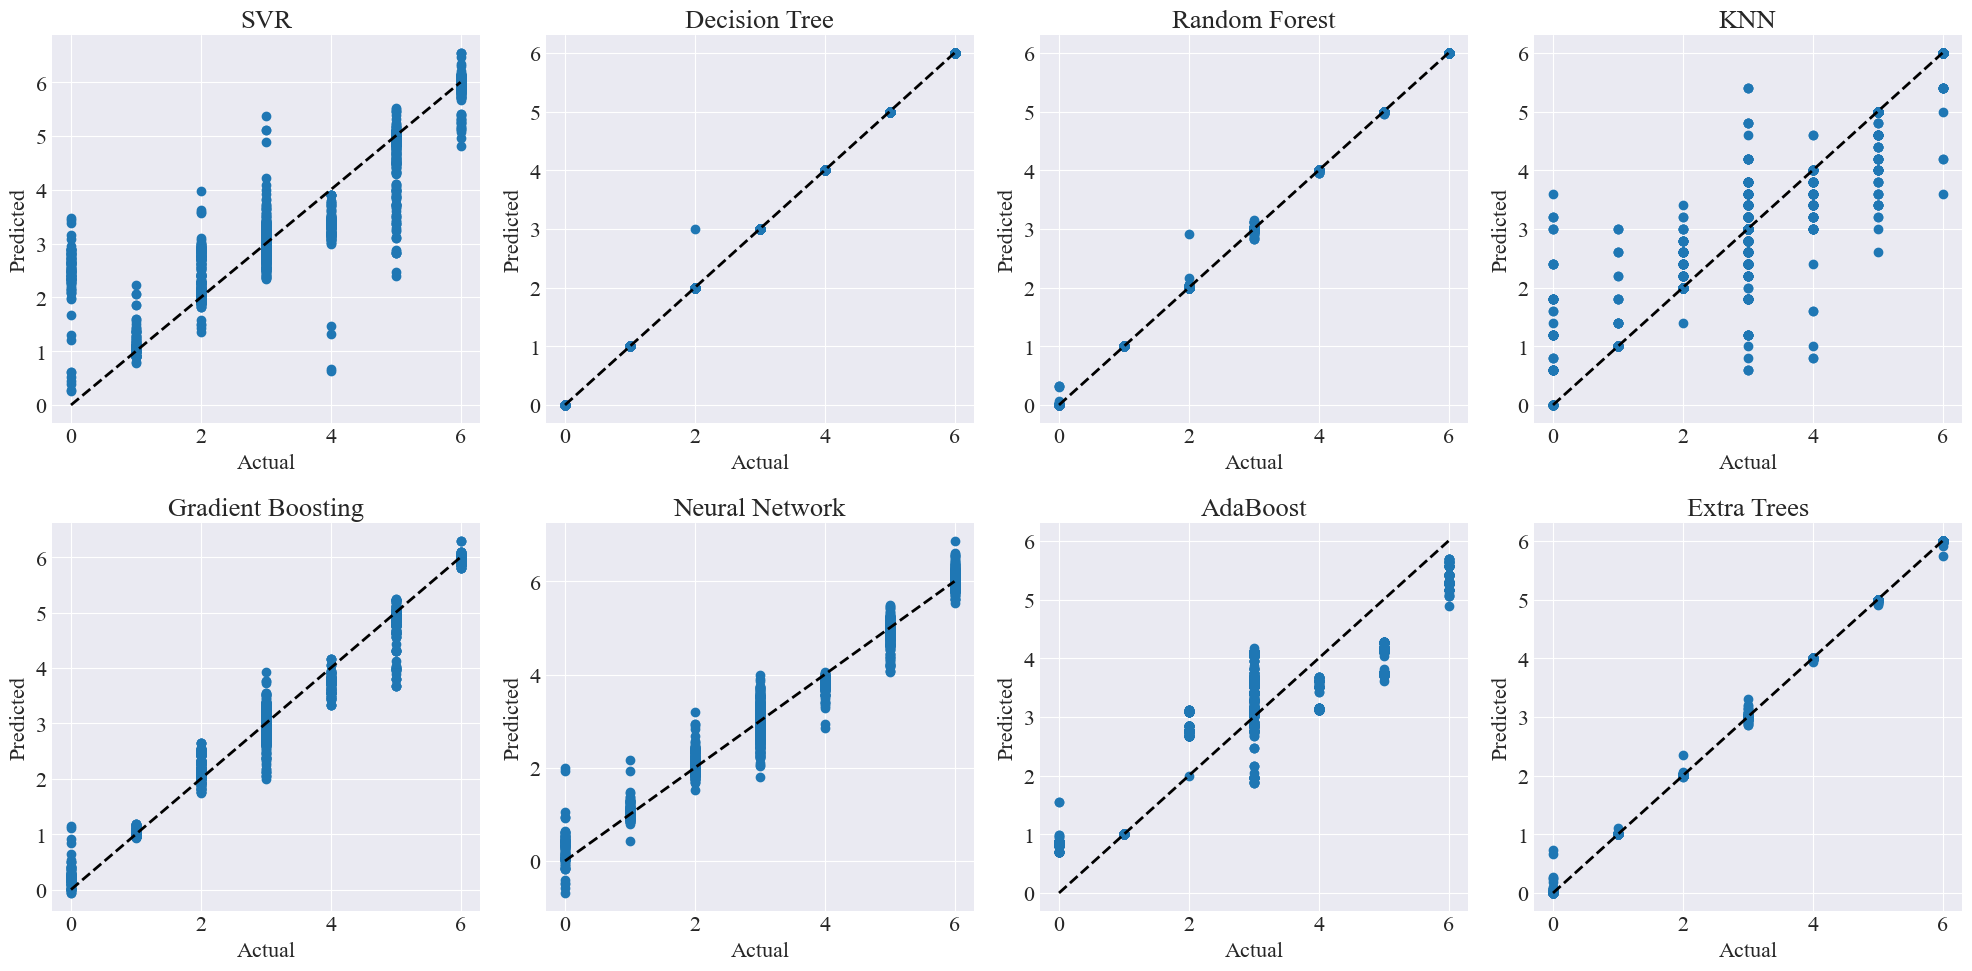

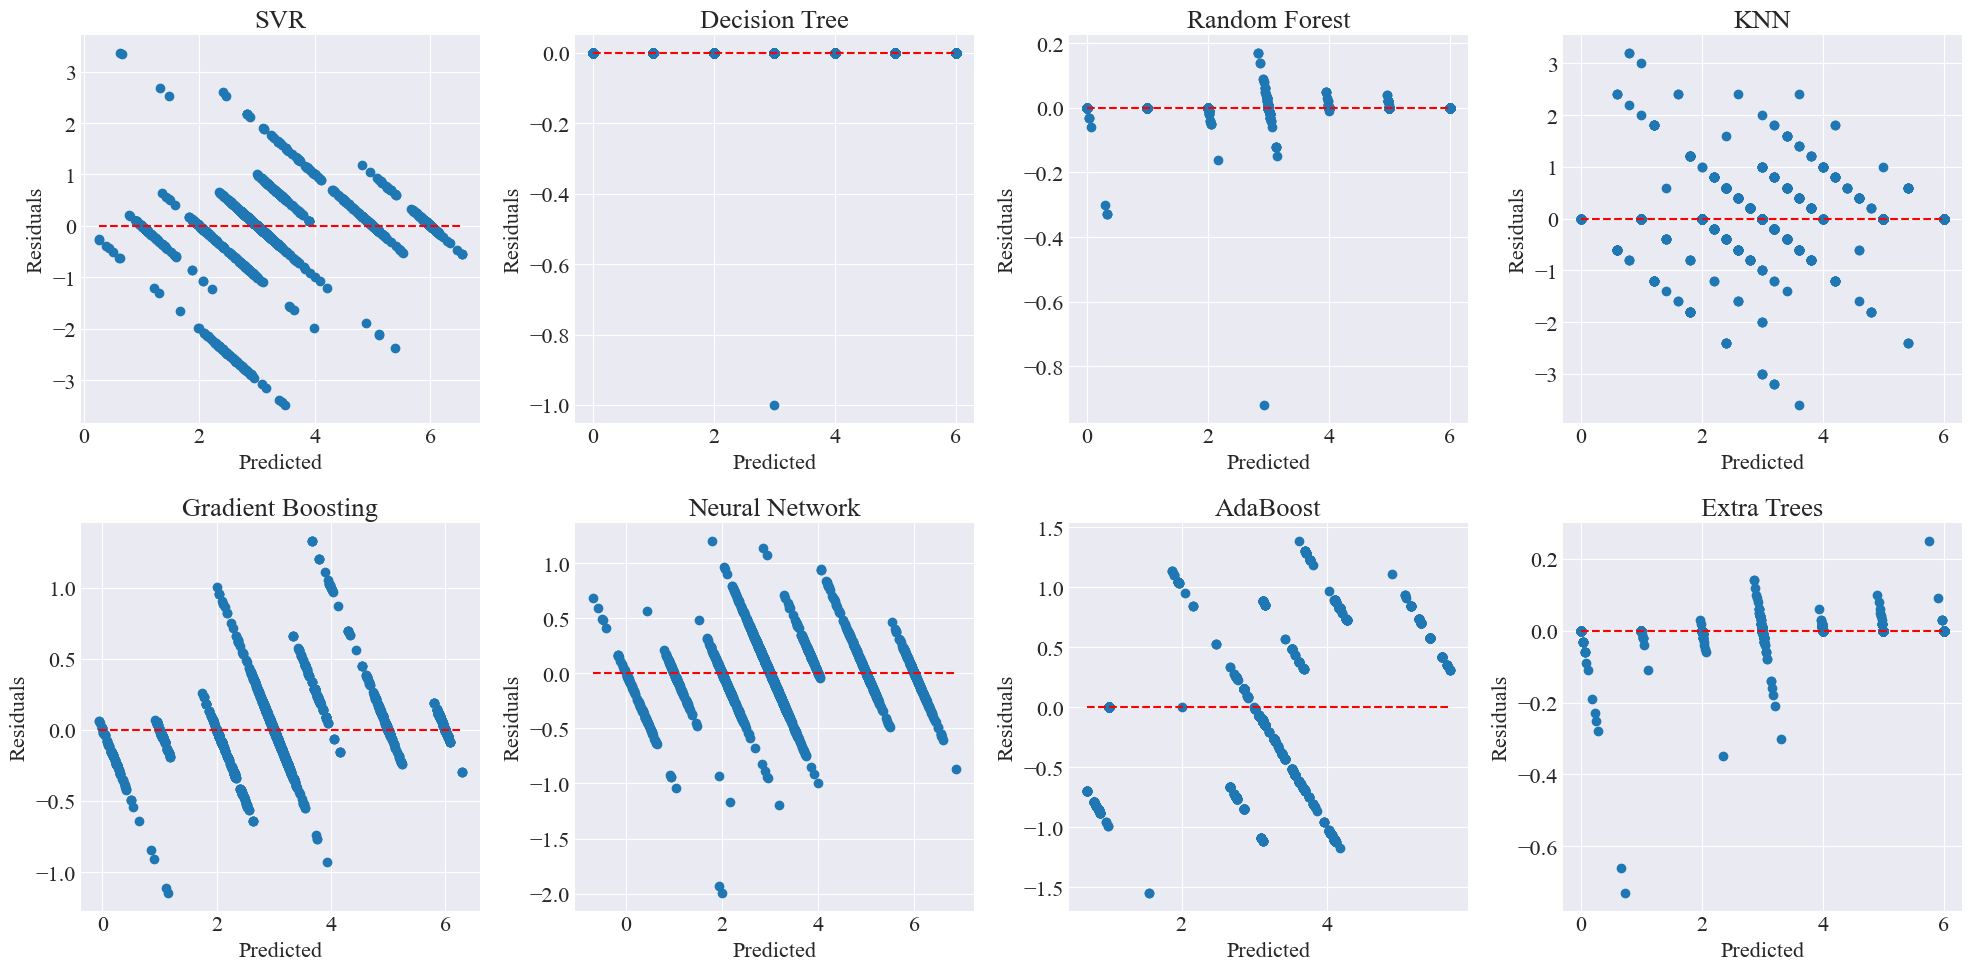

['Times New Roman']


In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})
# Setting the style
plt.style.use('seaborn-v0_8-darkgrid') 
plt.rcParams['font.family'] = 'Times New Roman'
# Scatterplot of actual vs. predicted values
plt.figure(figsize=(20, 10))
for i, (name, Ypred) in enumerate(predictions.items(), 1):
    plt.subplot(2, 4, i)
    plt.scatter(Ytest, Ypred)
    plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(name)
plt.tight_layout()
plt.show()

# residual plot
plt.figure(figsize=(20, 10))
for i, (name, Ypred) in enumerate(predictions.items(), 1):
    residuals = Ytest - Ypred
    plt.subplot(2, 4, i)
    plt.scatter(Ypred, residuals)
    plt.hlines(y=0, xmin=Ypred.min(), xmax=Ypred.max(), colors='r', linestyles='dashed')
    plt.xlabel('Predicted')
    plt.ylabel('Residuals')
    plt.title(name)
plt.tight_layout()
plt.show()
print(plt.rcParams['font.family'])

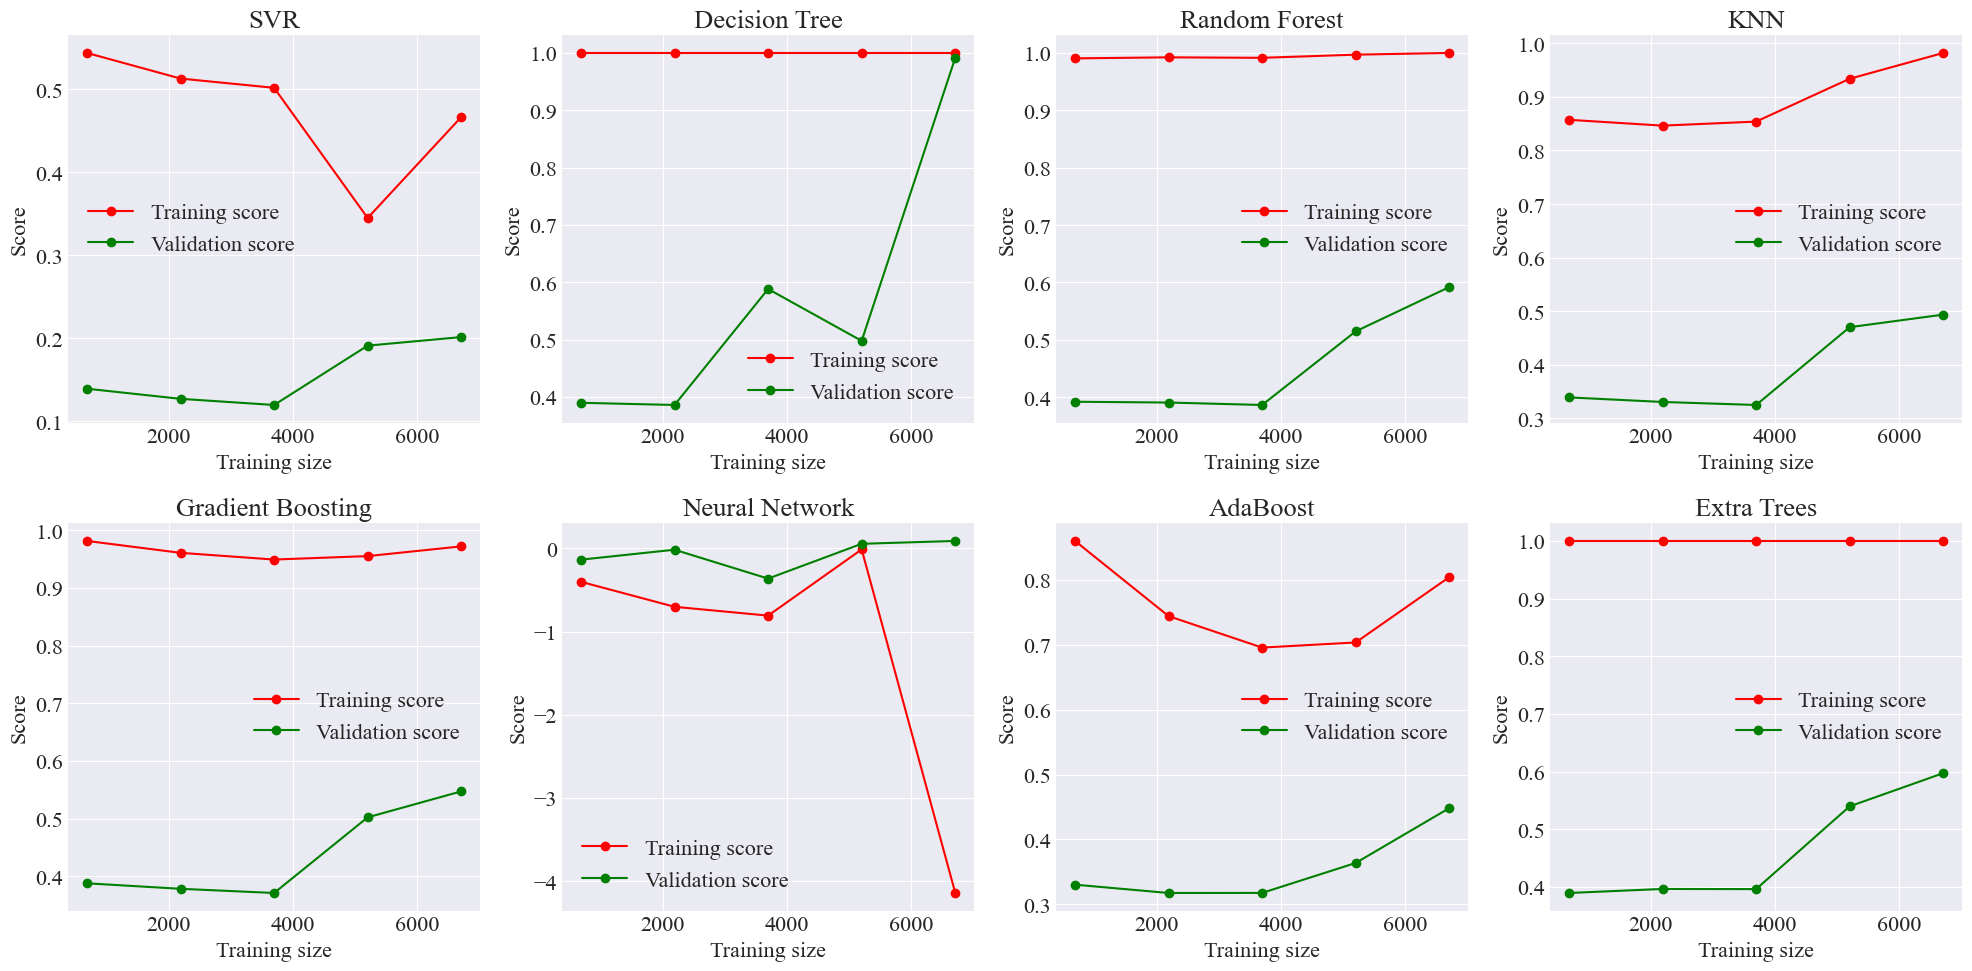

['Times New Roman']


In [19]:
# Mapping the learning curve
from sklearn.model_selection import learning_curve
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 16, 'font.family': 'Times New Roman'})
plt.figure(figsize=(20, 10))
for i, (name, model) in enumerate(models.items(), 1):
    train_sizes, train_scores, valid_scores = learning_curve(model, X, Y, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)
    plt.subplot(2, 4, i)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, valid_scores.mean(axis=1), 'o-', color='g', label='Validation score')
    plt.xlabel('Training size')
    plt.ylabel('Score')
    plt.title(name)
    plt.legend(loc='best')
plt.tight_layout()
plt.savefig('my_figure_10.png', dpi=300, facecolor='w')
plt.show()
print(plt.rcParams['font.family'])

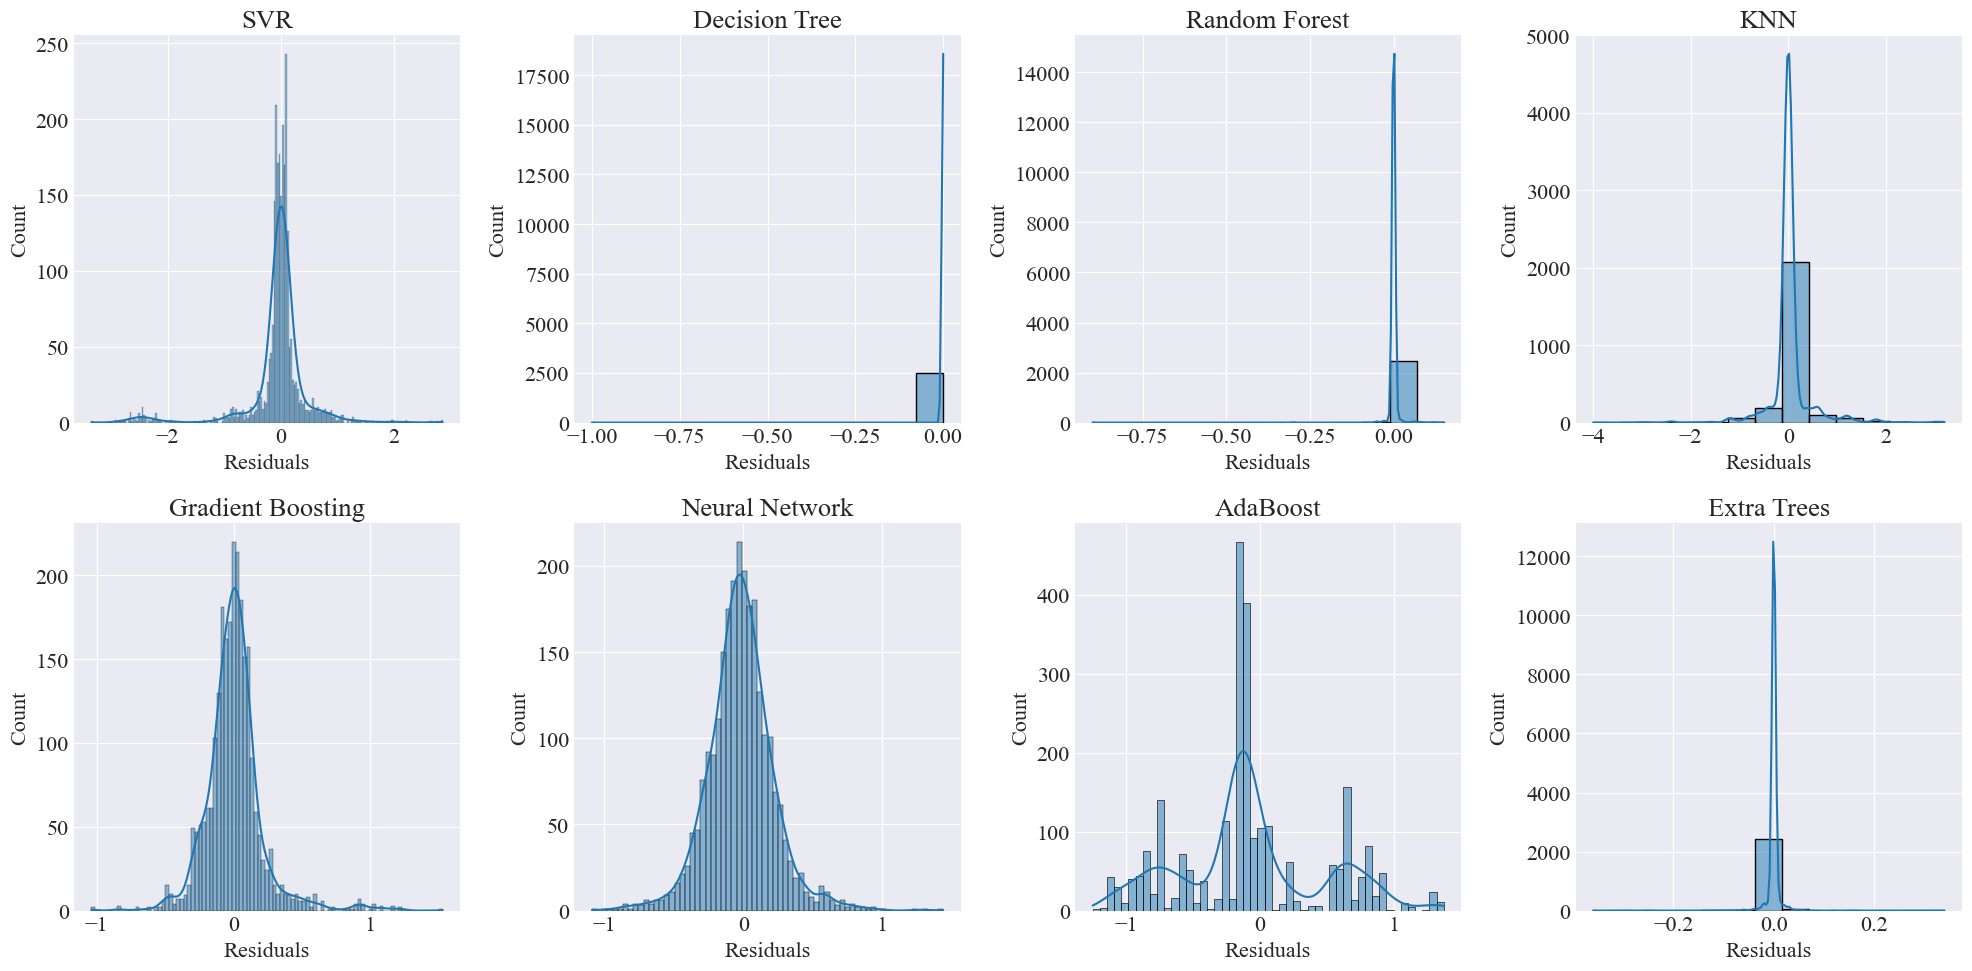

['Times New Roman']


In [20]:
# Mapping the histogram of residuals
plt.figure(figsize=(20, 10))
for i, (name, Ypred) in enumerate(predictions.items(), 1):
    residuals = Ytest - Ypred
    plt.subplot(2, 4, i)
    sns.histplot(residuals, kde=True)
    plt.xlabel('Residuals')
    plt.title(name)
plt.tight_layout()
plt.savefig('my_figure_11.png', dpi=300, facecolor='w')
plt.show()
print(plt.rcParams['font.family'])

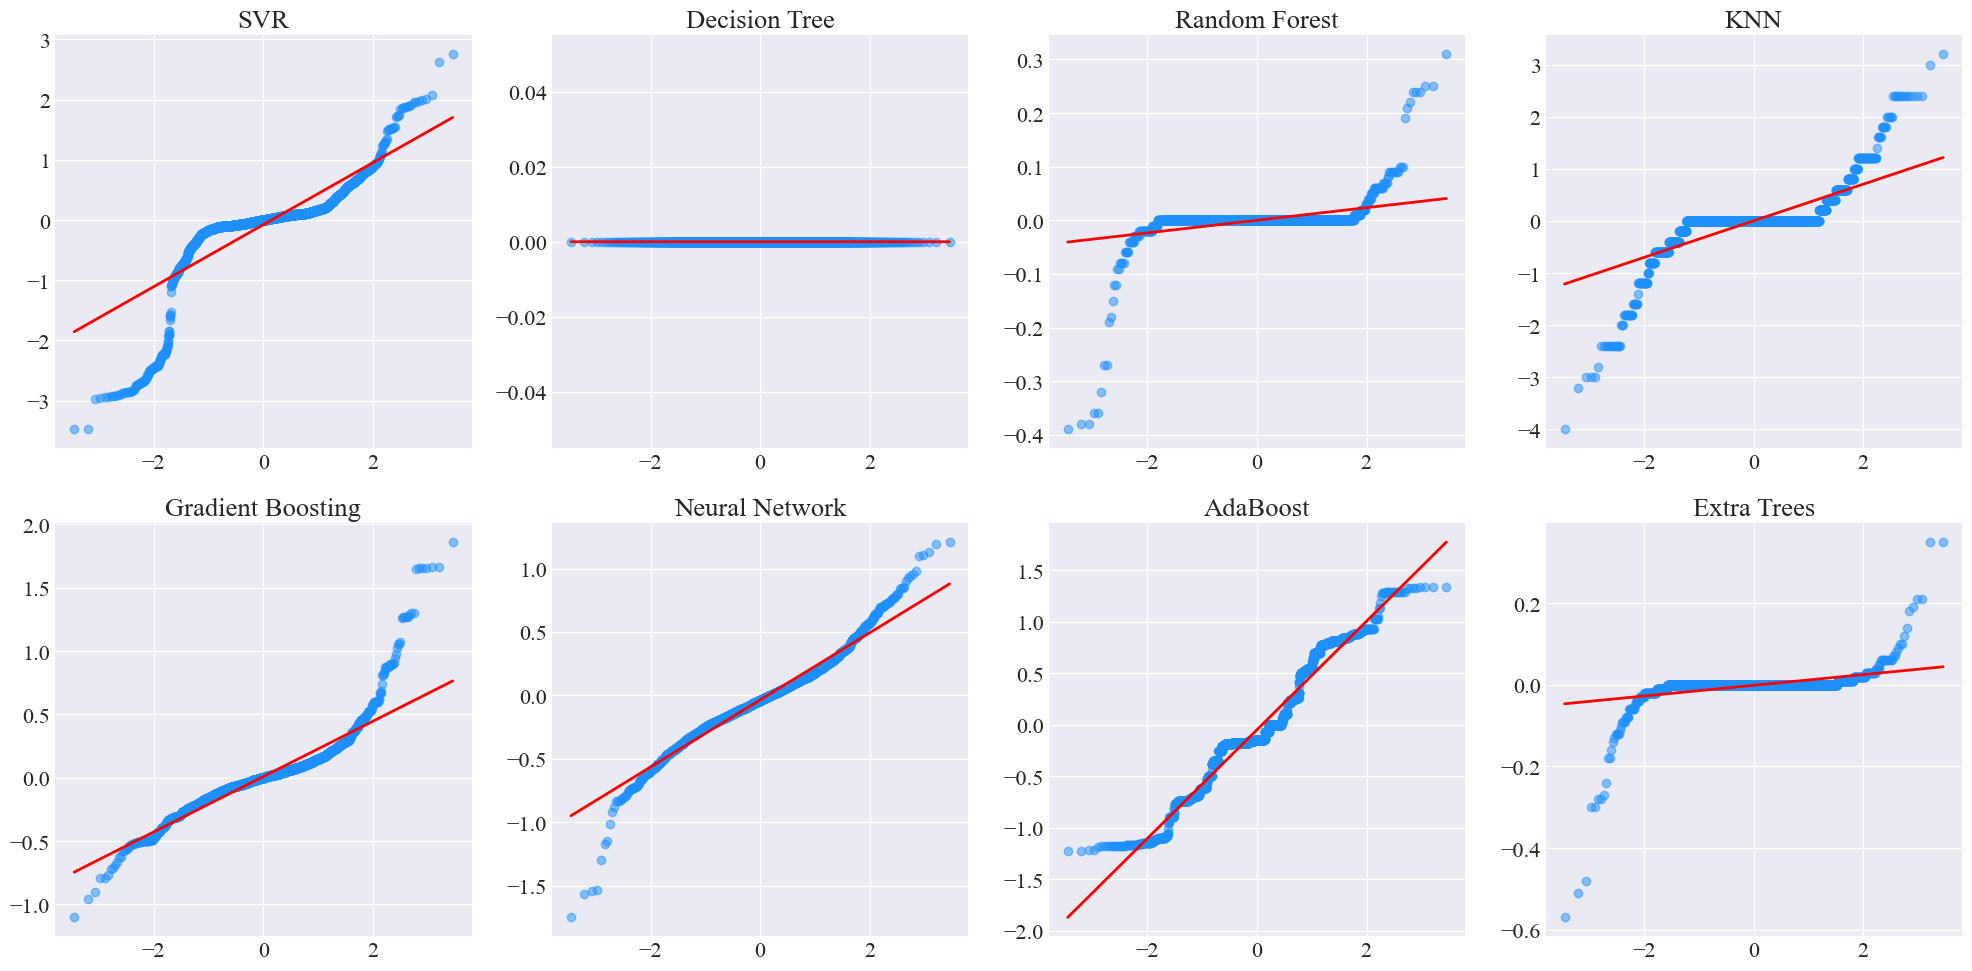

['Times New Roman']


In [21]:
# Plotting the Q-Q curve
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.figure(figsize=(20, 10))
for i, (name, Ypred) in enumerate(predictions.items(), 1):
    residuals = Ytest - Ypred
    plt.subplot(2, 4, i)
    (osm, osr), (slope, intercept, r) = stats.probplot(residuals, dist="norm", plot=None)
    plt.scatter(osm, osr, c='dodgerblue', alpha=0.5)  
    plt.plot(osm, slope*osm + intercept, 'r-', lw=2)
    plt.title(name)
plt.tight_layout()
plt.savefig('my_figure_12.png', dpi=300, facecolor='w')
plt.show()
print(plt.rcParams['font.family'])

In [ ]:
# Build a predictive regression model
# have't RI

In [25]:
X_ = df.iloc[:,:16]
Y = df.iloc[:,-1]

In [26]:
X_train,X_test,Ytrain,Ytest = train_test_split(X_,Y,test_size=0.3)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# df = pd.read_csv('path_to_your_dataset.csv')
# X = df.drop(columns=['target'])
# y = df['target']

# Standardized features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Define the model
models = {
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42)
}

# Train the model and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, Ytrain)
    predictions[name] = model.predict(X_test)

In [28]:
results = {}
for name, Ypred in predictions.items():
    mae = mean_absolute_error(Ytest, Ypred)
    mse = mean_squared_error(Ytest, Ypred)
    rmse = mse ** 0.5
    r2 = r2_score(Ytest, Ypred)
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R^2": r2}

# Convert the result to a DataFrame and print it!
results_df = pd.DataFrame(results).T
print(results_df)

                        MAE       MSE      RMSE       R^2
SVR                0.297912  0.391278  0.625522  0.782295
Decision Tree      0.000794  0.000794  0.028177  0.999558
Random Forest      0.001886  0.000923  0.030379  0.999487
KNN                0.111870  0.123525  0.351462  0.931271
Gradient Boosting  0.139984  0.049264  0.221956  0.972590
Neural Network     0.128318  0.037110  0.192639  0.979352
AdaBoost           0.393462  0.273881  0.523336  0.847614
Extra Trees        0.001556  0.000350  0.018701  0.999805


In [29]:
Xtrain.shape

(5877, 18)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Drawing heat maps
# Through the color changes, it is possible to visualize which features have a strong correlation with each other and which features have a weak correlation with each other. The depth and positive and negative colors in the heatmap indicate the magnitude and direction of the correlation, which facilitates in-depth data analysis and feature engineering.

/home/shenjiesss/miniconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18 19 35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/shenjiesss/miniconda3/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


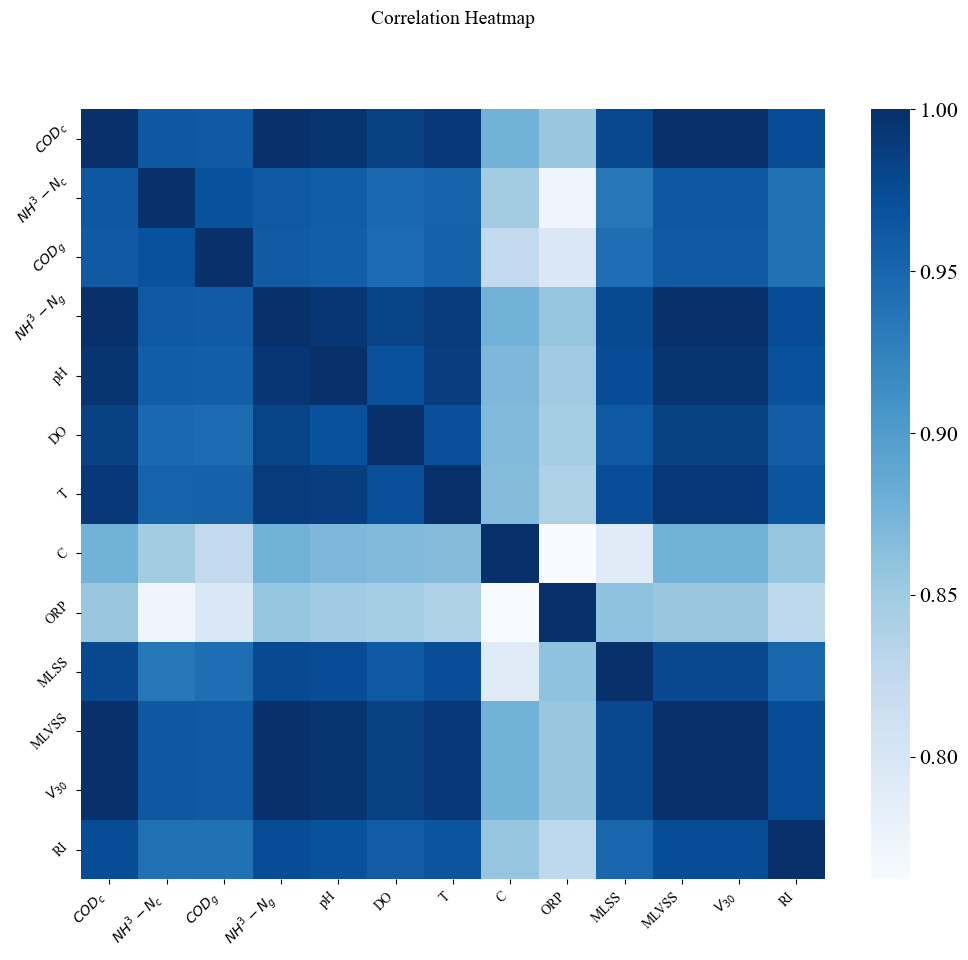

['Times New Roman']


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 16, 'font.family': 'Times New Roman'})

# 1. Load data
X = c.drop('18', axis=1)  
y = c['18']  

# 2. Create new feature (optional)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# 3. feature selection
selector = SelectKBest(score_func=f_classif, k=13) 
X_new = selector.fit_transform(X_poly, y)

# 4. Data standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_new)

# Calculate the correlation matrix
correlation_matrix = pd.DataFrame(scaled_data).corr()

# Customized axis names, including contextual labels
axis_names = [r'$COD_{c}$', r'$NH^3-N_{c}$', r'$COD_{g}$', r'$NH^3-N_{g}$', 'pH', 'DO', 'T', 'C', 'ORP', 'MLSS', 'MLVSS', r'$V_{30}$', 'RI']  # 替换为您的特征名称

# Plotting heat maps and applying customized axis names
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap=plt.cm.Blues, fmt='.2f', xticklabels=axis_names, yticklabels=axis_names)

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45, ha='right',fontsize=10)  
plt.yticks(rotation=45,fontsize=10)  

plt.title('Correlation Heatmap',y=1.1,fontsize=14)
plt.savefig('my_figure_1.png', dpi=300, facecolor='w')
plt.show()
print(plt.rcParams['font.family'])

In [ ]:
# Mapping the significance of features

In [36]:
X = c.iloc[:,:18]
Y = c.iloc[:,-1]

In [37]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

In [38]:
Xtrain

0    1    2      3       4       5      6     7     8      9     10  \
1241  1.0  0.0  0.0  176.7   9.886  13.168  0.226   986  8.52  10.87  16.40   
7873  0.0  0.0  1.0  201.8   6.184  28.190  0.124  1022  7.88  10.56  15.40   
2085  0.0  0.0  1.0  166.7  10.880  15.176  0.568  1027  8.52  10.94  13.60   
8083  0.0  0.0  1.0  211.9   9.996  29.180  0.409   987  8.68   6.64  19.88   
1524  1.0  0.0  0.0  176.7   9.886   4.768  0.089   965  8.42  11.59  14.30   
...   ...  ...  ...    ...     ...     ...    ...   ...   ...    ...    ...   
6435  1.0  0.0  0.0  227.8   7.752  19.890  0.389   967  8.44  11.85  14.10   
6403  1.0  0.0  0.0  120.6   4.873  19.300  0.490   971  8.41  11.56  14.10   
5943  0.0  0.0  1.0  199.7   8.196  30.300  0.249  1099  8.51  13.09   7.00   
954   0.0  0.0  1.0  208.1   9.687  29.600  0.070   982  8.29   8.10  18.70   
4706  1.0  0.0  0.0  166.7   9.176  18.170  0.119   938  8.25  10.65  13.20   

         11     12     13  14        15        16  17  
1241  346.8  2.618  0.816  74  1.333198  1.333258  96  
7873  337.8  1.276  0.596  49  1.333080  1.333383  60  
2085  376.4  0.566  1.116  76  1.333111  1.333178  48  
8083  287.9  2.416  1.219  49  1.333118  1.333173  80  
1524  351.1  2.418  1.296  76  1.333107  1.333115  96  
...     ...    ...    ...  ..       ...       ...  ..  
6435  340.9  1.289  0.468  90  1.333065  1.333793  96  
6403  349.8  2.319  1.318  39  1.333158  1.333445  90  
5943  389.7  2.519  1.166  74  1.333116  1.333636  79  
954   344.8  2.386  1.002  75  1.333382  1.333130  80  
4706  454.4  1.396  0.499  80  1.333115  1.333372  96  

[5877 rows x 18 columns]

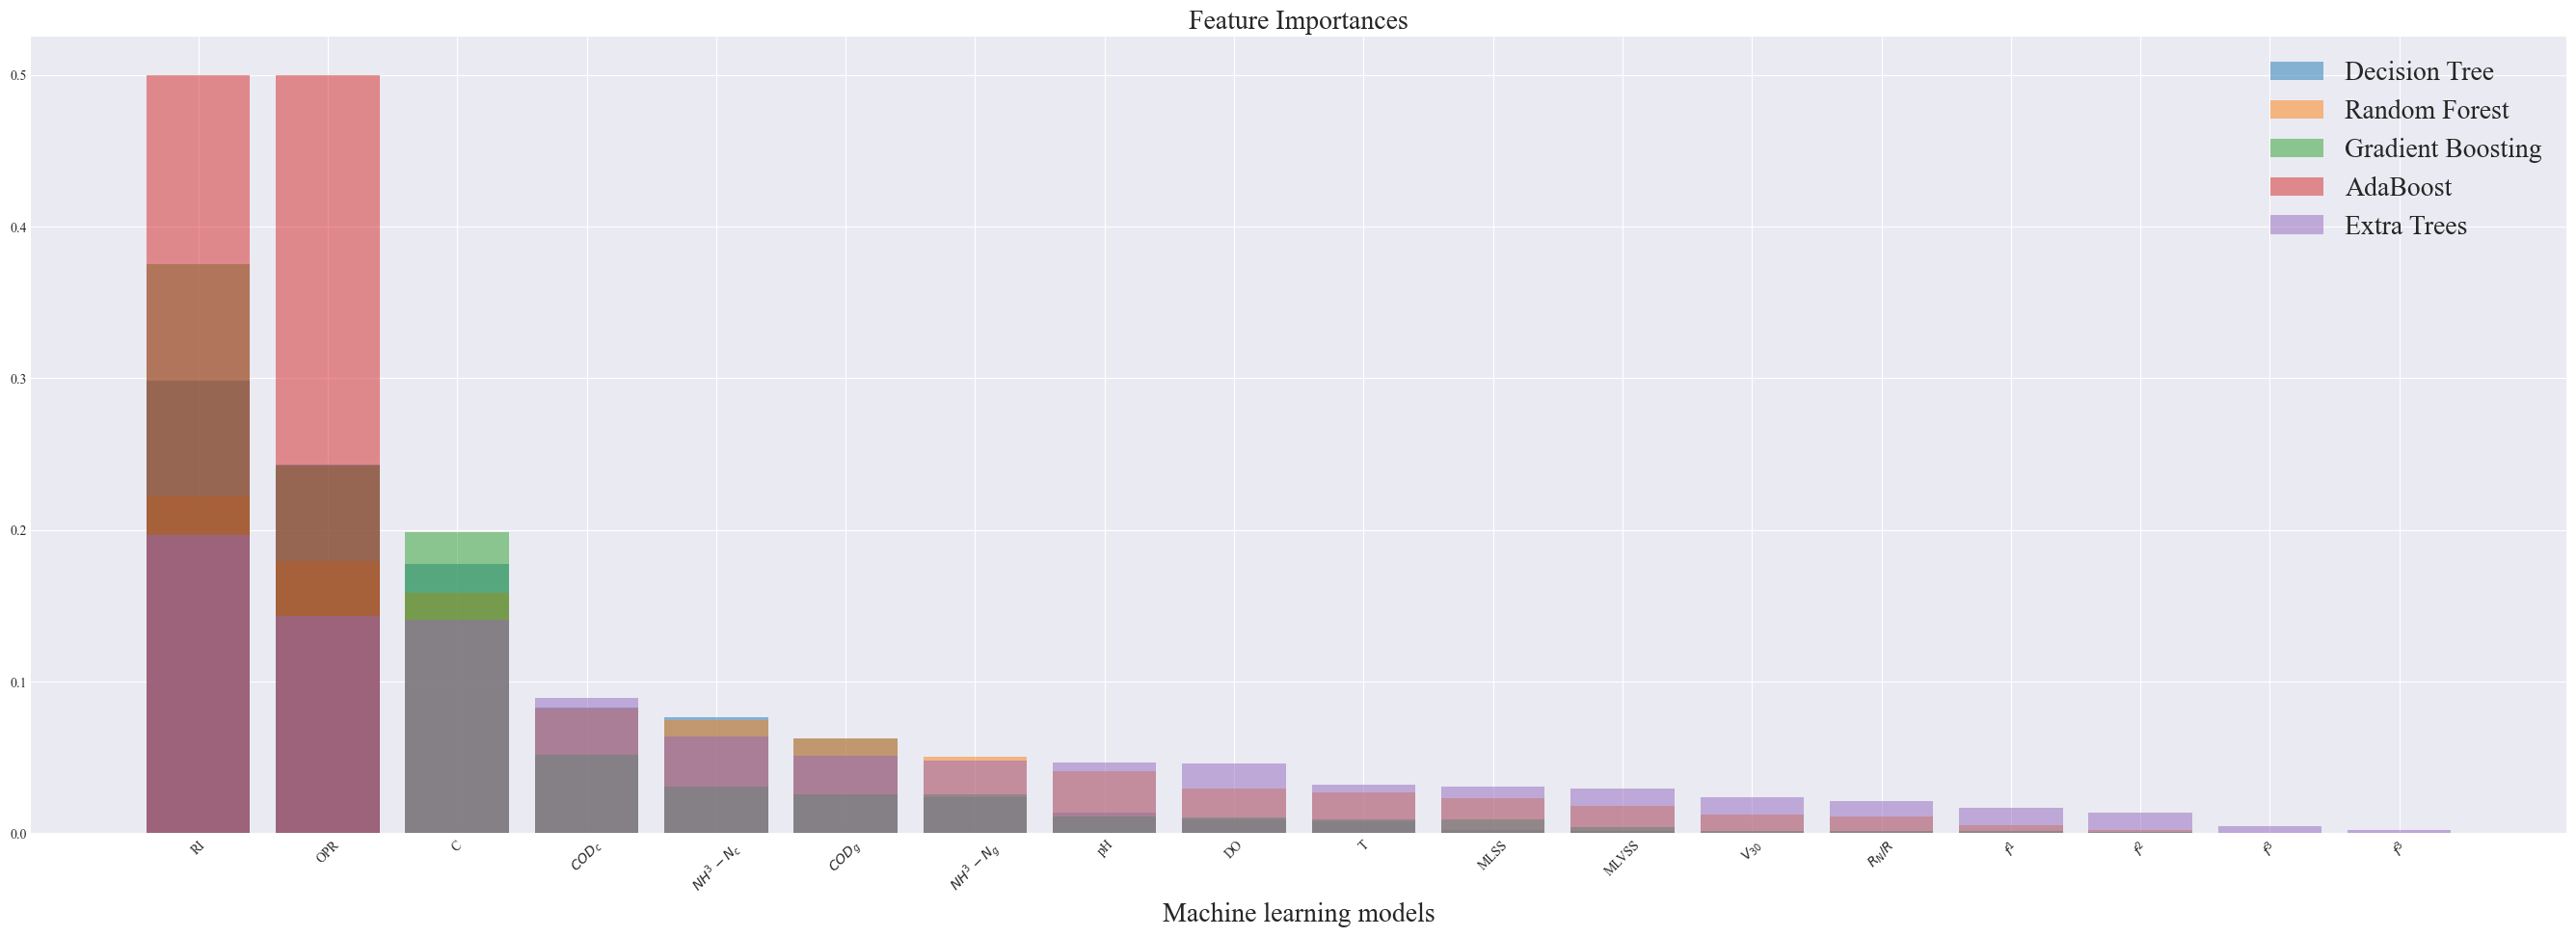

['Times New Roman']

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'Times New Roman'
# Suppose Xtrain and Ytrain are your training data and labels
# Xtrain = ...
# Ytrain = ...

models = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}



# Suppose you have a list of feature names that correspond to the feature importance of the model
feature_names = ['RI', 'OPR', 'C', r'$COD_{c}$', r'$NH^3-N_{c}$', r'$COD_{g}$', r'$NH^3-N_{g}$','pH', 'DO', 'T', 'MLSS', 'MLVSS', r'$V_{30}$',r'$R_N/R$',r'$f^1$',r'$f^2$',r'$f^3$',r'$f^3$']  # 请替换为您的实际特征名称

# Creating Graphics
plt.figure(figsize=(27, 10))
plt.title("Feature Importances",fontsize=20)

# Cycle through training each model and try to plot feature importance bars
for model_name, model in models.items():
    # training model
    model.fit(Xtrain, Ytrain)
    
    # Check if the model has the 'feature_importances_' attribute
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Mapping the importance of features
        plt.bar(range(len(importances)), importances[indices], align="center", alpha=0.5, label=model_name)

# Setting up custom x-coordinate labels
plt.xticks(range(len(feature_names)), feature_names, rotation=45,fontsize=10)  
plt.yticks(fontsize=10)
plt.xlabel('Machine learning models',fontsize=20)
# Add Legend
plt.legend(loc='upper right',fontsize=20)
plt.tight_layout()
plt.savefig('my_figure_2.png', dpi=300, facecolor='w')
plt.show()
plt.rcParams['font.family']

In [ ]:
# Mapping the importance of replacement

/home/shenjiesss/miniconda3/lib/python3.11/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


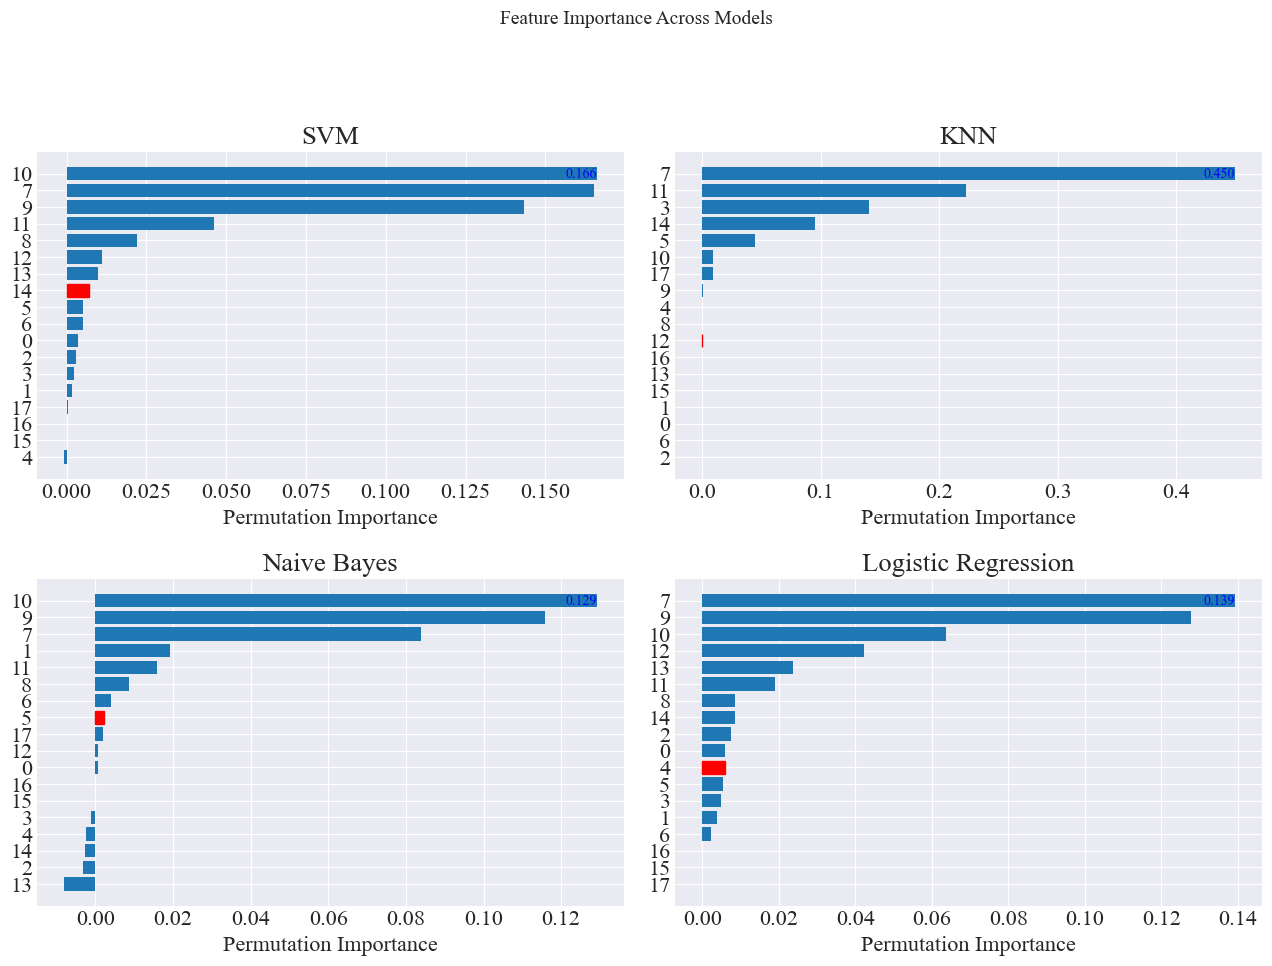

['Times New Roman']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.sans-serif'] = ['Times New Roman']
# Define a list of models
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(solver='newton-cg', random_state=42, max_iter=2000)
}

# Setting the subgraph layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))
fig.suptitle('Feature Importance Across Models',fontsize=14,y=1)

# Plot the ranked importance of each model
for ax, (name, model) in zip(axes.flatten(), models.items()):
    model.fit(Xtrain, Ytrain)
    perm_importance = permutation_importance(model, Xtest, Ytest, n_repeats=30, random_state=42)
    sorted_idx = perm_importance.importances_mean.argsort()
    bars = ax.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
    
    # Find the index with the highest importance value
    max_idx = np.argmax(perm_importance.importances_mean)

    bars[max_idx].set_color('red')  
    
    # Adding custom annotations
    ax.text(perm_importance.importances_mean[sorted_idx][-1], np.where(sorted_idx == max_idx)[0][0], 
            f'{perm_importance.importances_mean[max_idx]:.3f}', 
            va='center', ha='right', fontsize=10, color='blue')
    
    ax.set_yticks(range(len(sorted_idx)))
    ax.set_yticklabels([X.columns[i] for i in sorted_idx])
    ax.set_xlabel('Permutation Importance')
    ax.set_title(name)

# Adjusting subgraph spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('my_figure_3.png', dpi=300, facecolor='w')
plt.show()
plt.rcParams['font.family']

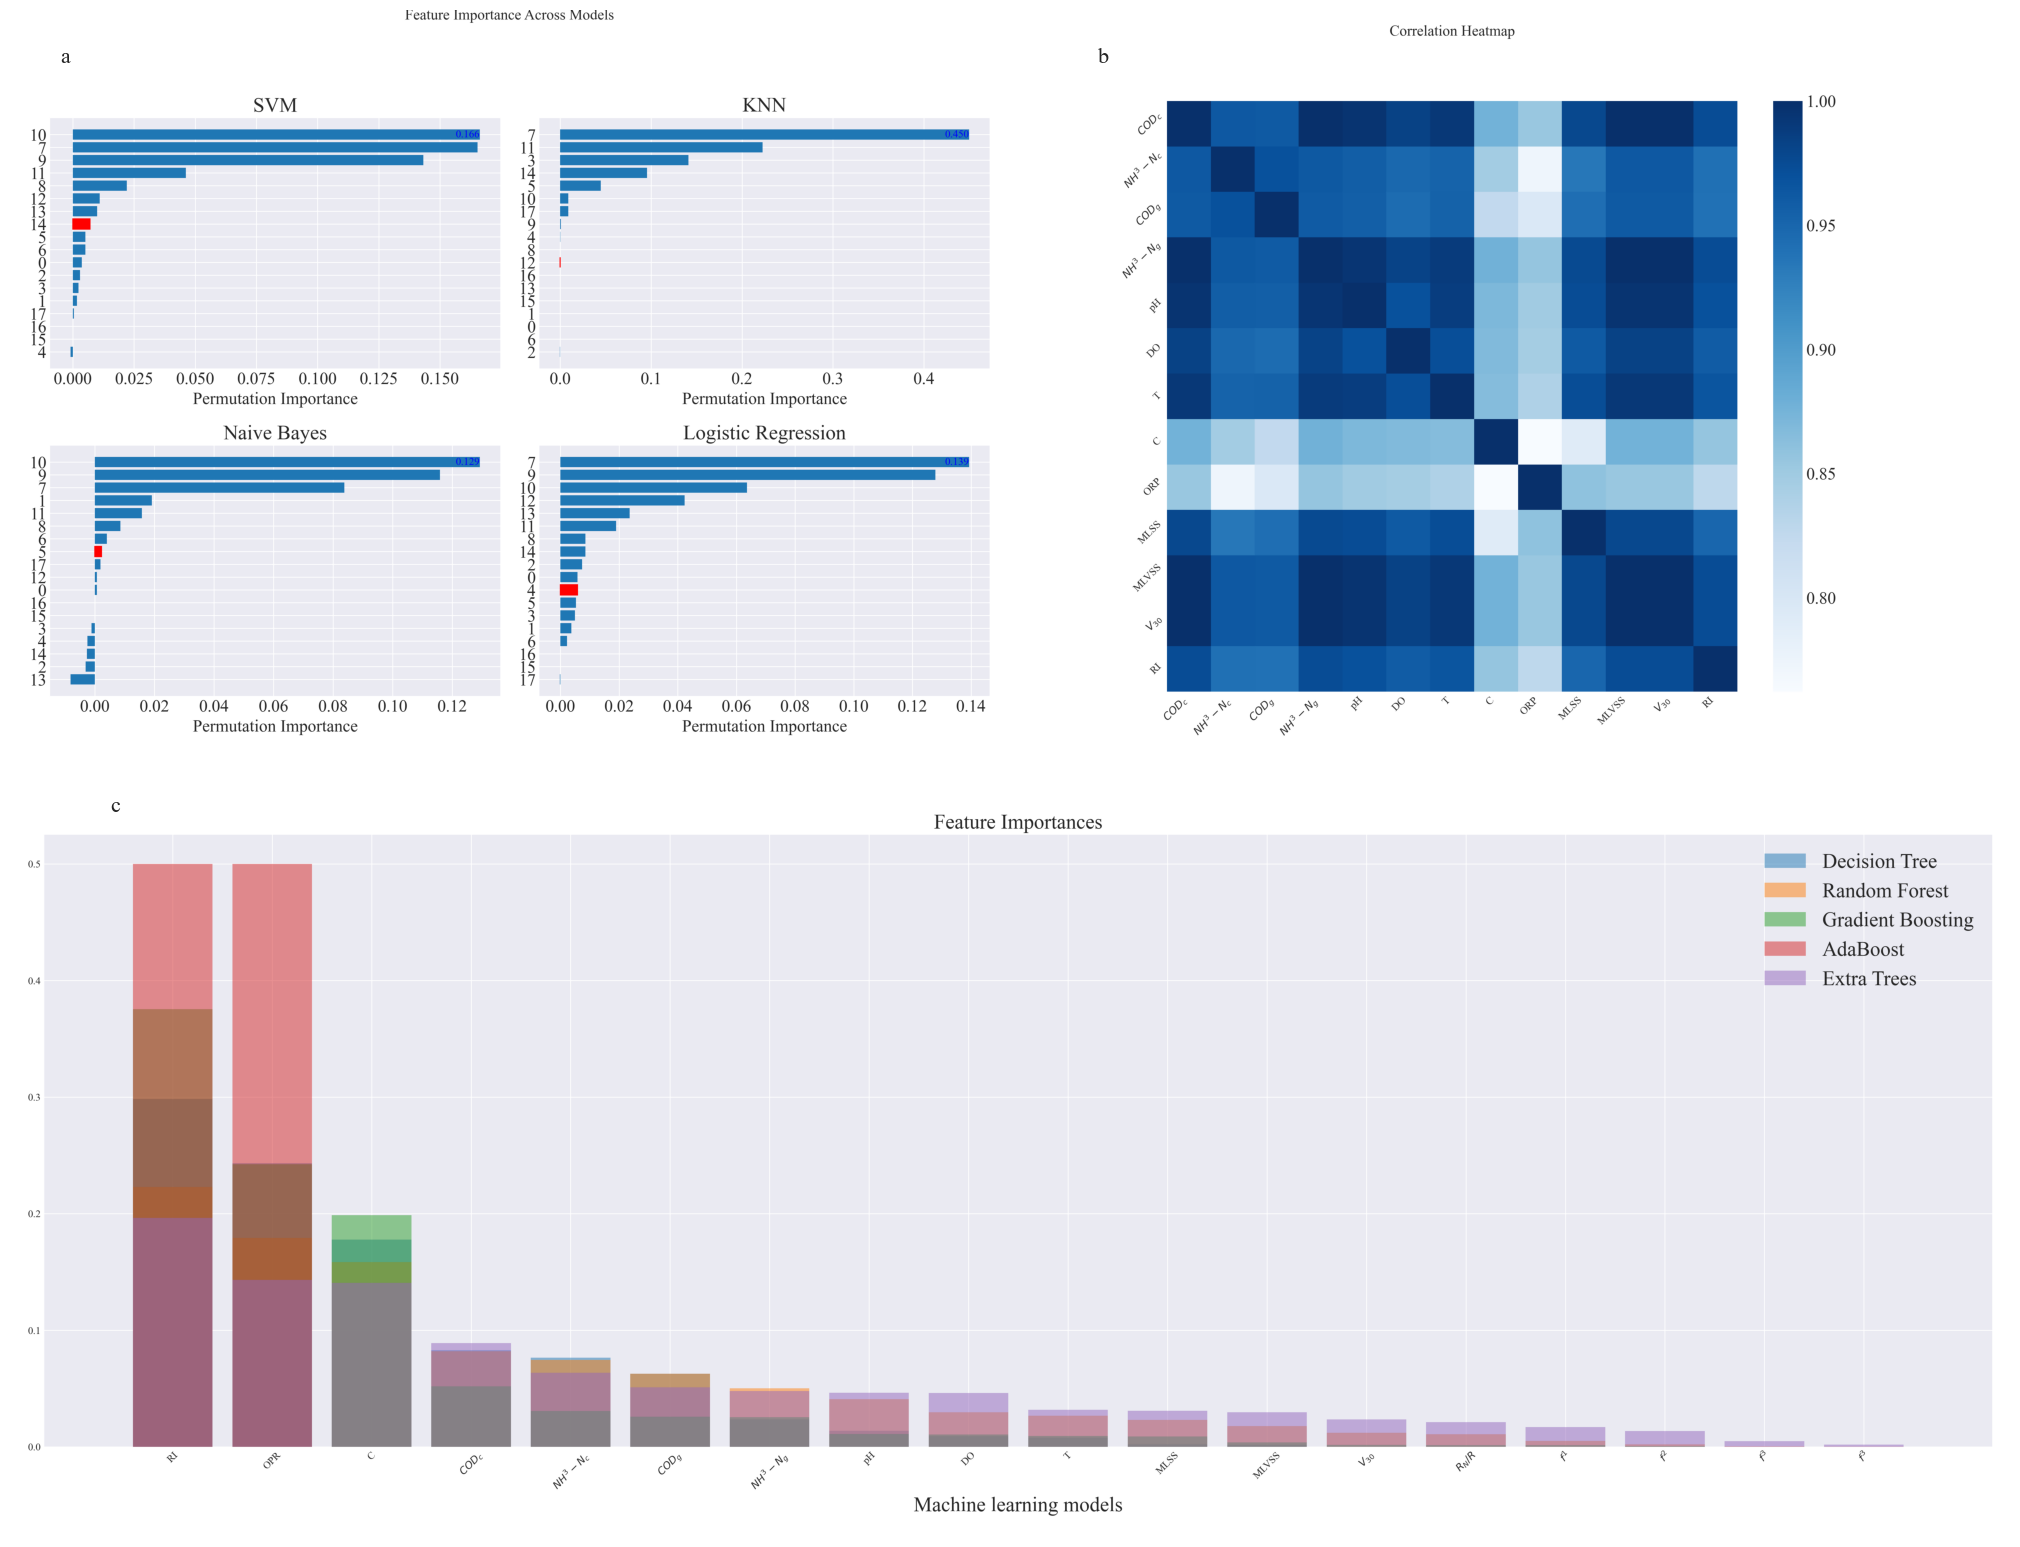

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('my_figure_1.png')  
img2 = mpimg.imread('my_figure_2.png')  
img3 = mpimg.imread('my_figure_3.png')  

fig = plt.figure(figsize=(25, 20))

ax1 = fig.add_subplot(2, 2, 1)  
ax2 = fig.add_subplot(2, 2, 2)  

ax1.imshow(img3)
ax1.axis('off') 
ax1.text(0.05, 0.95, 'a', transform=ax1.transAxes, fontsize=16, verticalalignment='top')

ax2.imshow(img1)
ax2.axis('off')  
ax2.text(0.05, 0.95, 'b', transform=ax2.transAxes, fontsize=16, verticalalignment='top')

ax3 = fig.add_subplot(2, 1, 2)  
ax3.imshow(img2)
ax3.axis('off')  
ax3.text(0.05, 1, 'c', transform=ax3.transAxes, fontsize=16, verticalalignment='top')
plt.subplots_adjust(left=0.1, wspace=0.005, hspace=0.01)
plt.savefig('my_figure_4.png', dpi=300, facecolor='w')
plt.show()
plt.rcParams['font.family']

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

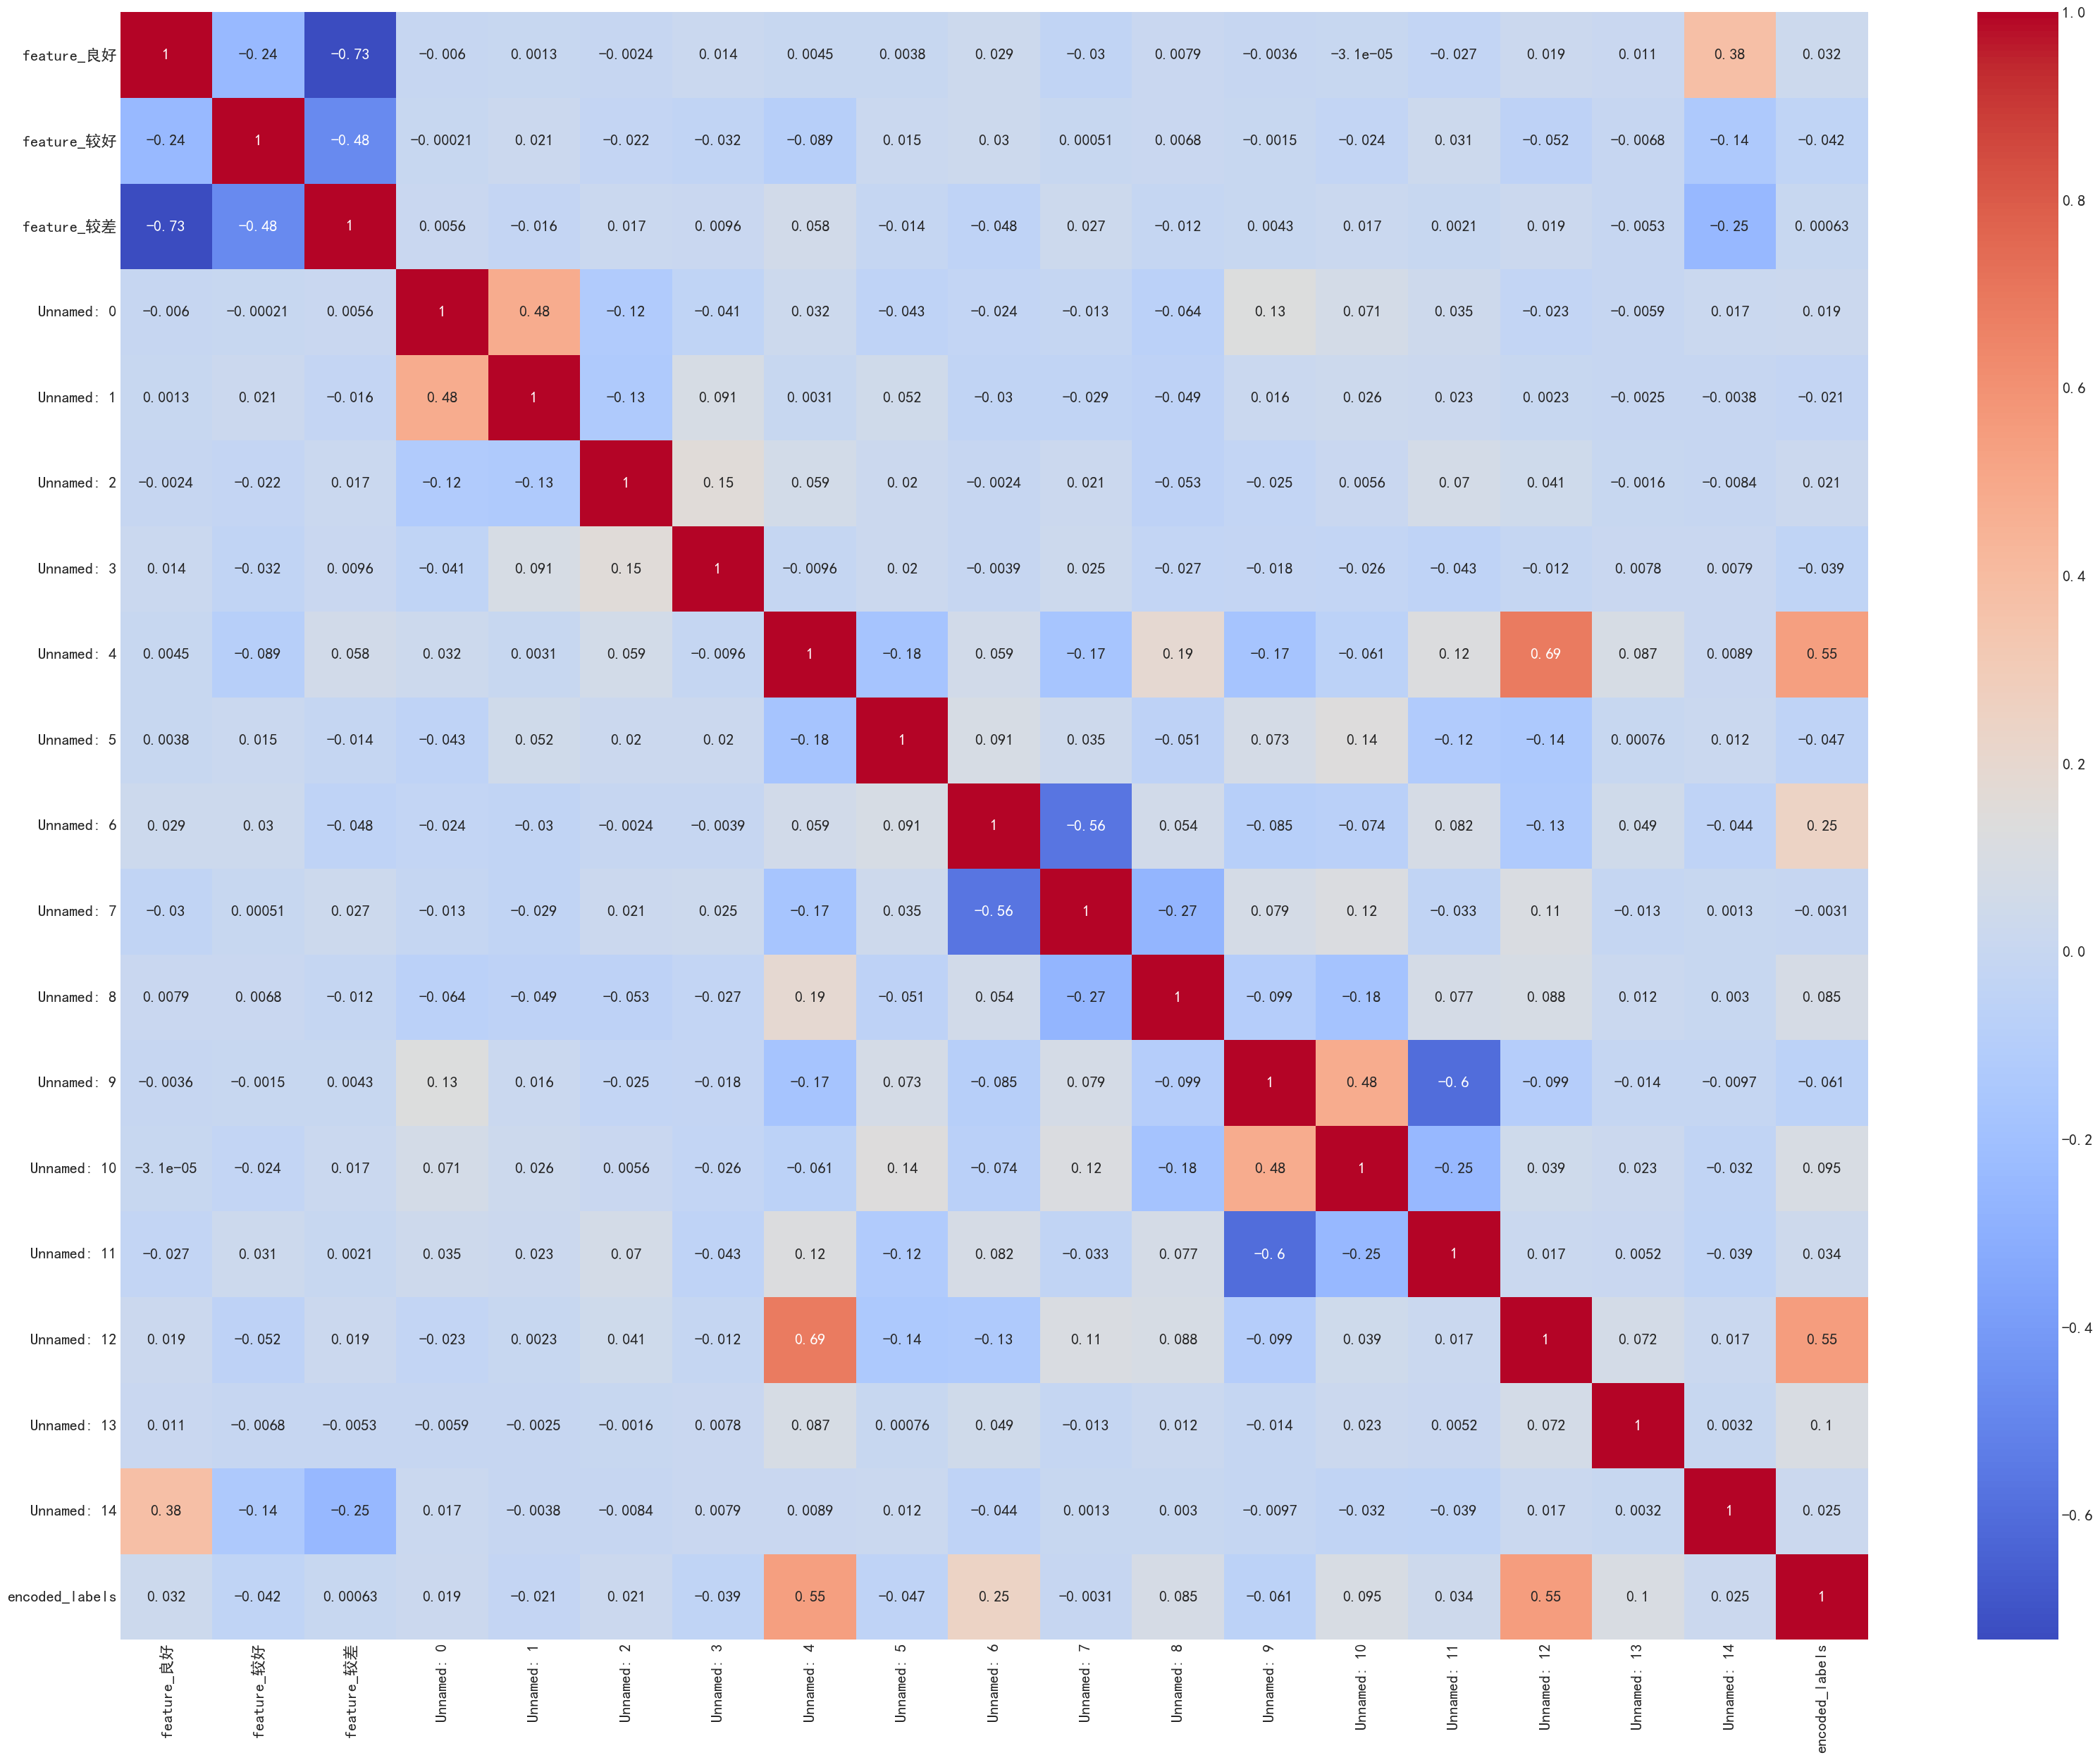

In [71]:
import matplotlib
from matplotlib import pyplot as plt

# 指定字体名称
matplotlib.rcParams['font.family'] = 'SimHei'  # 或者您系统中支持的任何中文字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 现在您可以绘制包含中文的图表
plt.figure(figsize=(40,30))
_ = sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.savefig('my_figure_corr.png', dpi=300, facecolor='w')
plt.show()

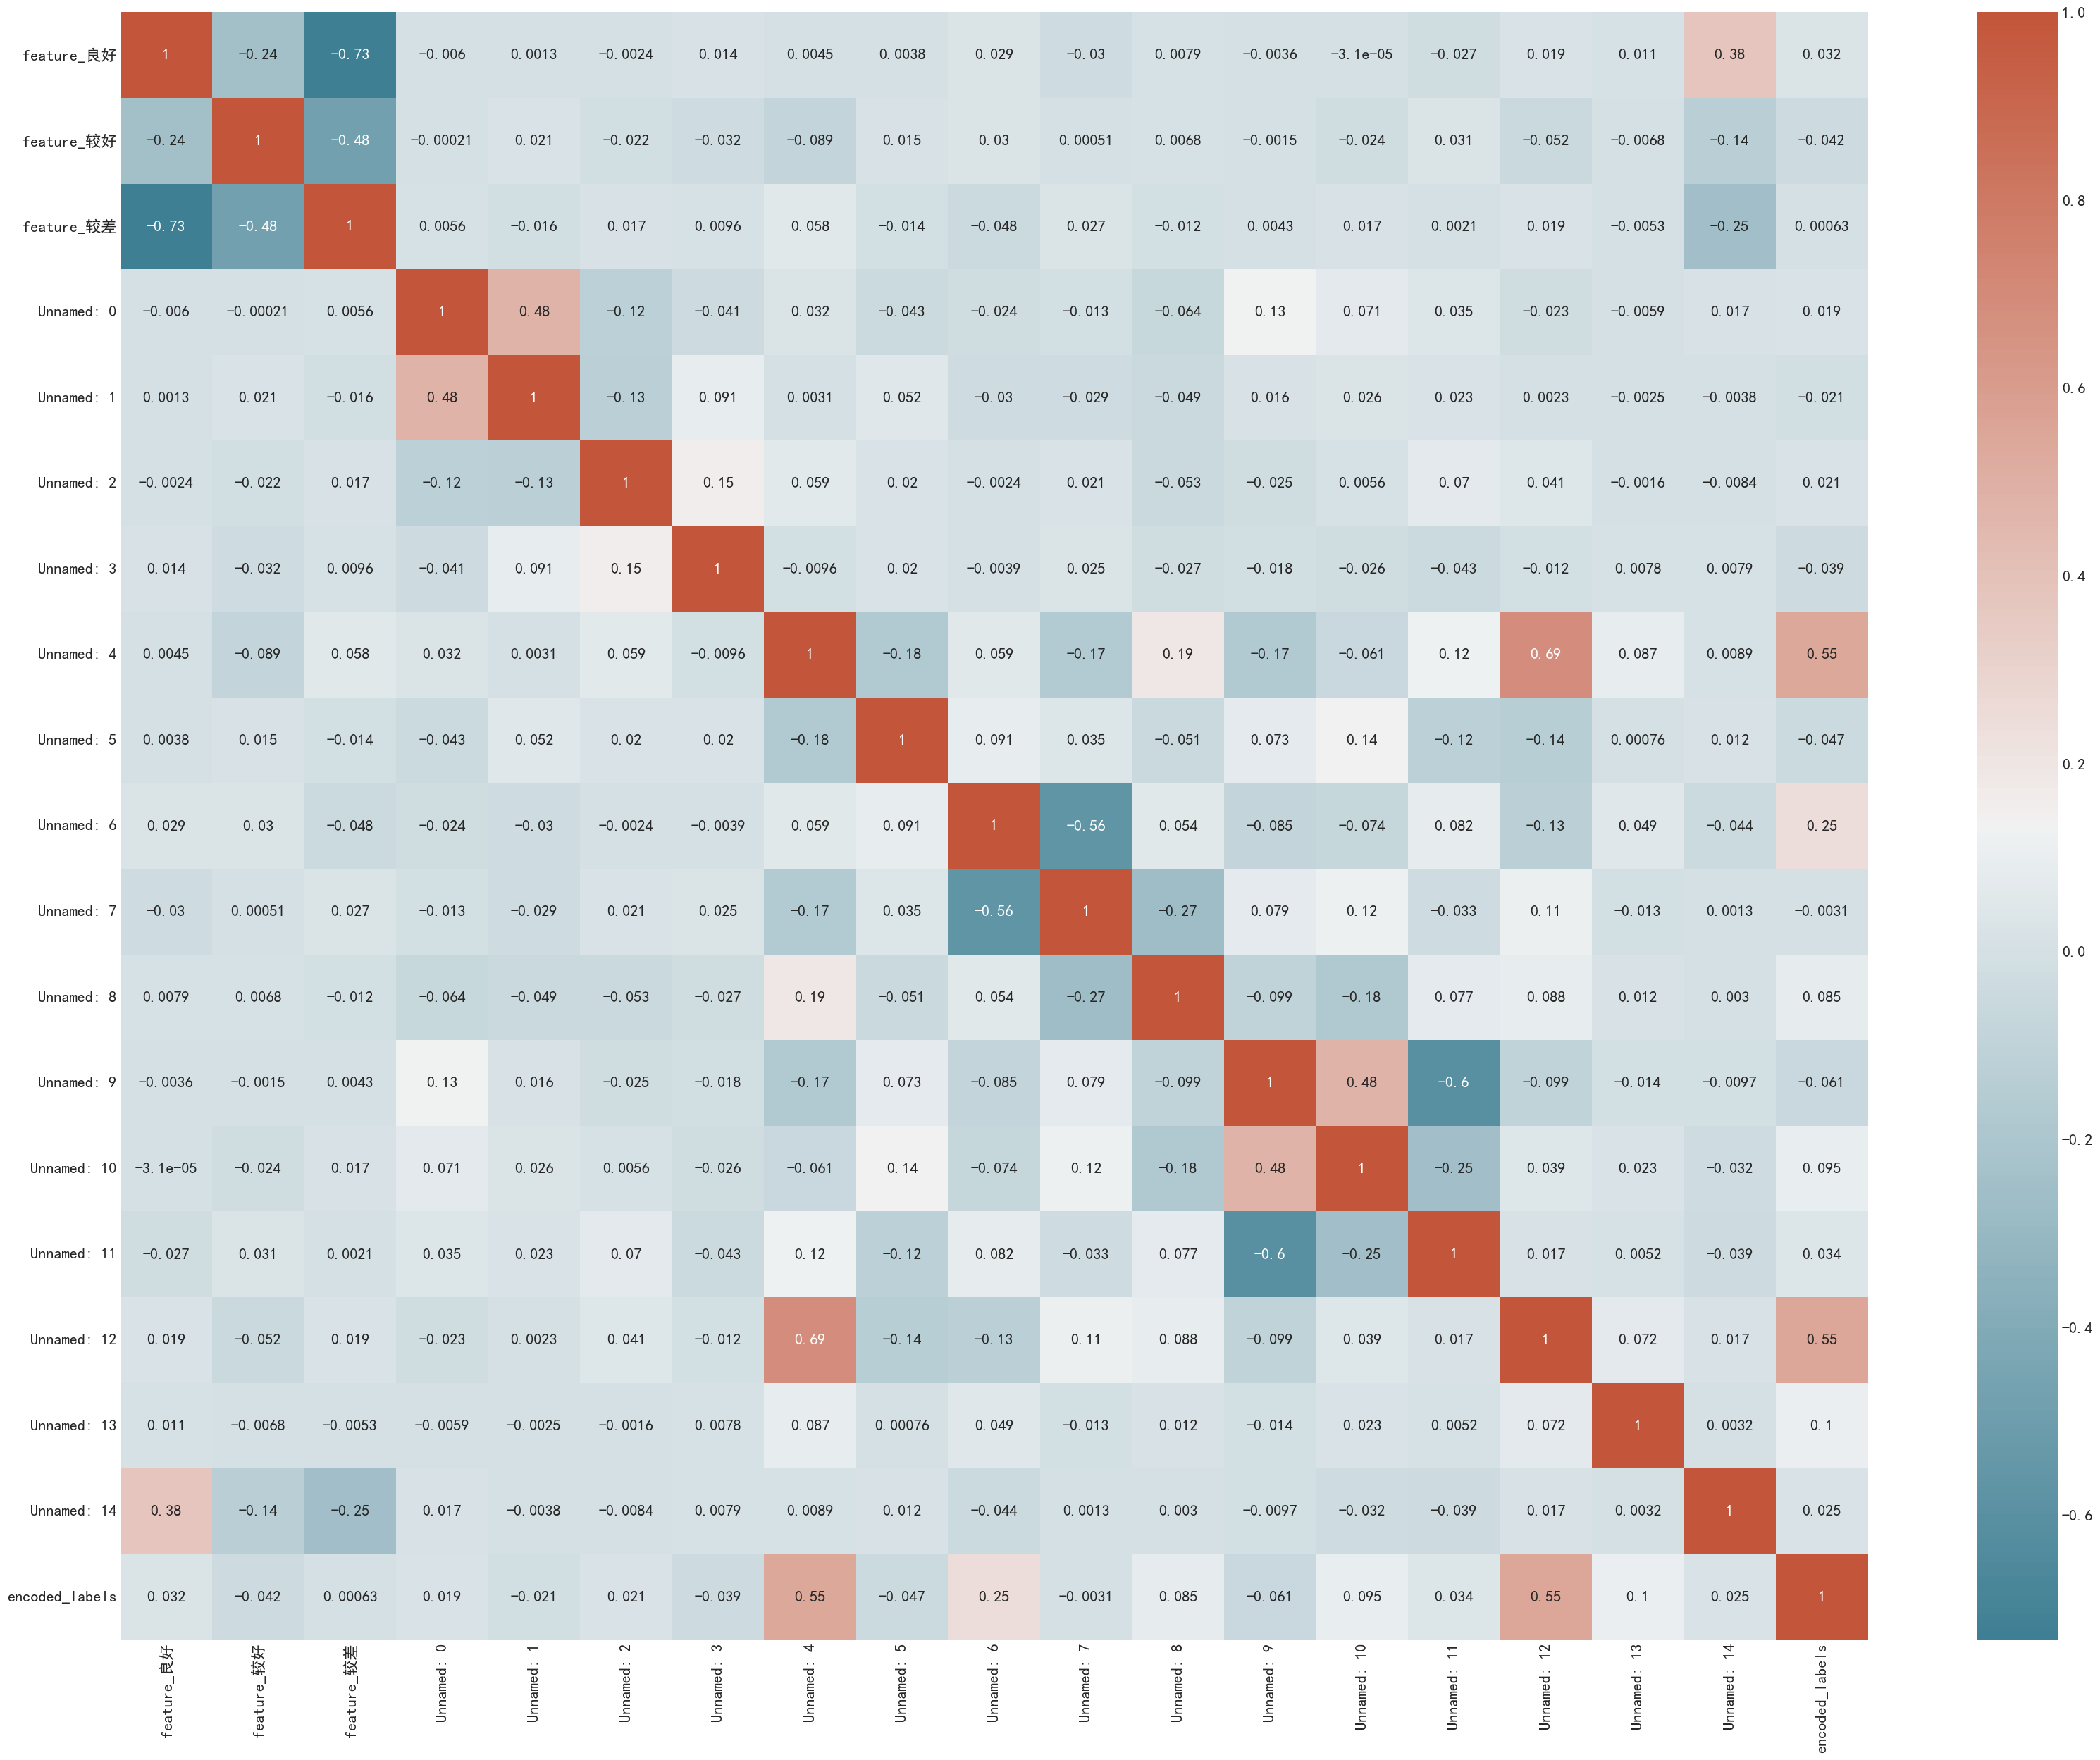

['SimHei']

In [72]:
import seaborn as sns

cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig = plt.figure(figsize=(40,30))
_ = sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()
plt.rcParams['font.family']

In [55]:
# Building Early Warning Regression Models
# have RI
# The models Accuracy, Precision, Recall, and F1 are trained separately because my computer can't run them together.

In [56]:
X = df.iloc[:,:18]
Y = df.iloc[:,-1]

In [57]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

In [58]:
Xtrain.shape

(5877, 18)

In [24]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)
    accuracy = accuracy_score(Ytest, Ypred)
    print(f"{name} Accuracy: {accuracy:.6f}")

SVM Accuracy: 0.828503
Decision Tree Accuracy: 0.996427
Random Forest Accuracy: 0.999206
Naive Bayes Accuracy: 0.690353
KNN Accuracy: 0.967447
Logistic Regression Accuracy: 0.739976
Gradient Boosting Accuracy: 0.999603
Neural Network Accuracy: 0.721318
AdaBoost Accuracy: 0.657007
Extra Trees Accuracy: 0.996824


In [59]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)
    precision = precision_score(Ytest, Ypred, average='weighted',zero_division=1)
    print(f"{name} Precision: {precision:.6f}")

SVM Precision: 0.820231
Decision Tree Precision: 0.998811
Random Forest Precision: 0.999603
Naive Bayes Precision: 0.796802
KNN Precision: 0.975139
Logistic Regression Precision: 0.716777
Gradient Boosting Precision: 1.000000
Neural Network Precision: 0.801849
AdaBoost Precision: 0.778164
Extra Trees Precision: 0.998022


In [27]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score


# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)
    recall = recall_score(Ytest, Ypred, average='weighted')
    print(f"{name} Recall: {recall:.6f}")

SVM Recall: 0.819770
Decision Tree Recall: 0.999603
Random Forest Recall: 0.999206
Naive Bayes Recall: 0.686383
KNN Recall: 0.970623
Logistic Regression Recall: 0.749107
Gradient Boosting Recall: 0.999603
Neural Network Recall: 0.735212
AdaBoost Recall: 0.660183
Extra Trees Recall: 0.998015


In [28]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)
    f1 = f1_score(Ytest, Ypred, average='weighted')
    print(f"{name} F1 Score: {f1:.6f}\n")

SVM F1 Score: 0.792979

Decision Tree F1 Score: 0.999603

Random Forest F1 Score: 0.999204

Naive Bayes F1 Score: 0.697669

KNN F1 Score: 0.970610

Logistic Regression F1 Score: 0.709466

Gradient Boosting F1 Score: 0.999603

Neural Network F1 Score: 0.692340

AdaBoost F1 Score: 0.526909

Extra Trees F1 Score: 0.998007



In [60]:
# Plotting confusion matrices and ROC curves

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

def preprocess_data(X, Y):
    # Binarize target variables (ROC curves for multicategorical problems)
    Ybin = label_binarize(Y, classes=np.unique(Y))
    n_classes = Ybin.shape[1]

    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=42)
    Xtrain_bin, Xtest_bin, Ytrain_bin, Ytest_bin = train_test_split(X, Ybin, test_size=0.3, random_state=42)

    return Xtrain, Xtest, Ytrain, Ytest, Xtrain_bin, Xtest_bin, Ytrain_bin, Ytest_bin, n_classes

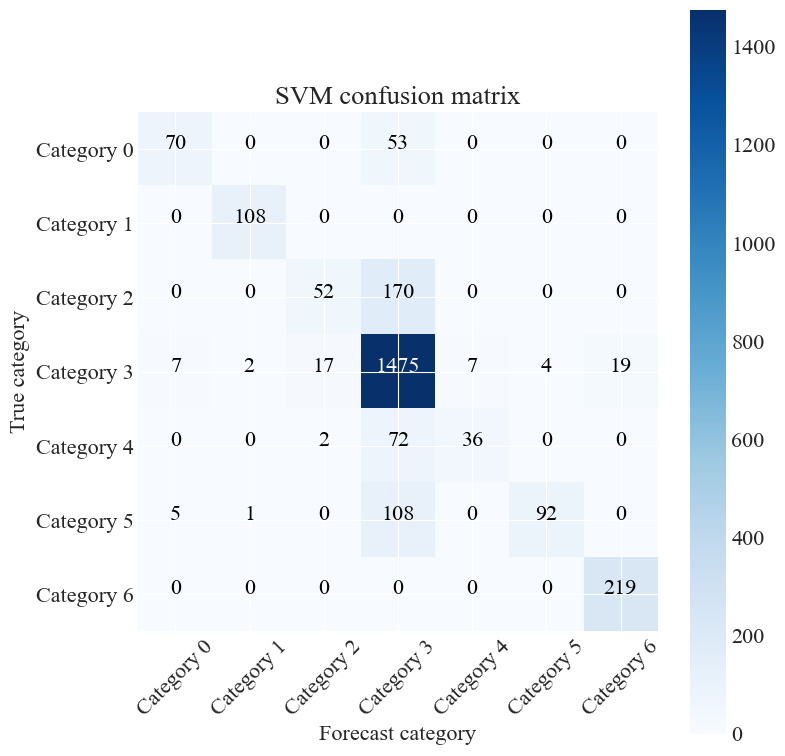

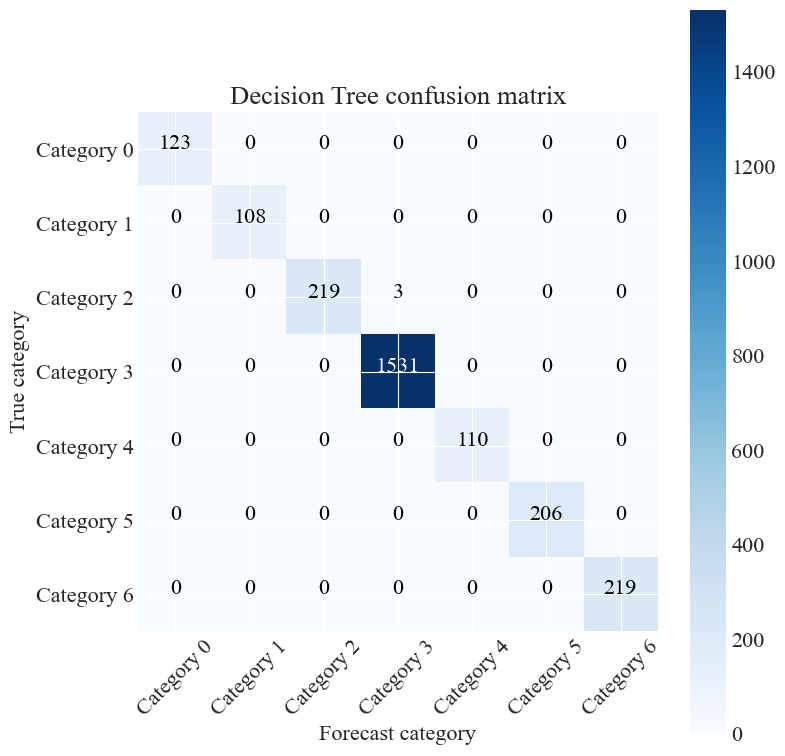

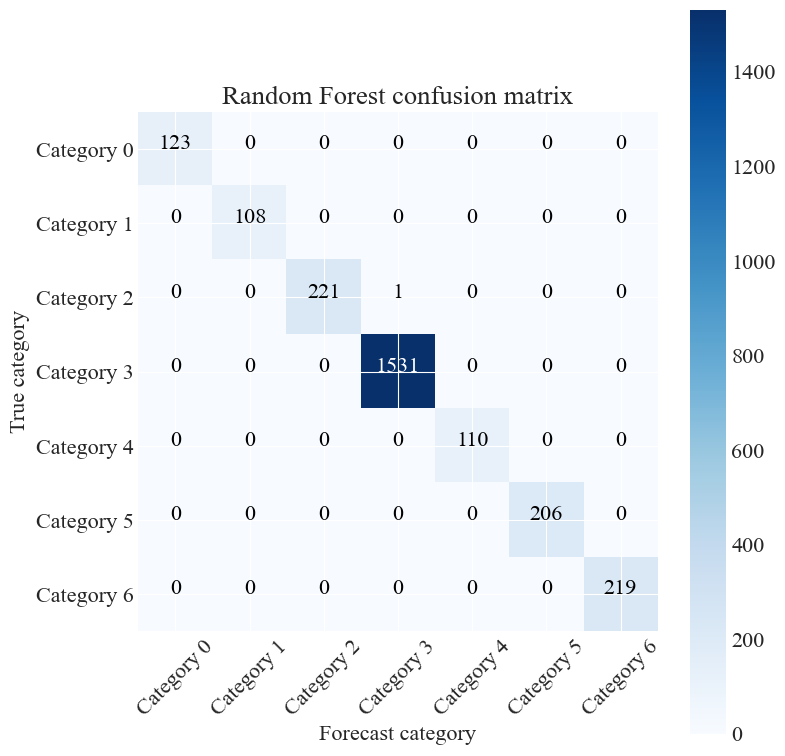

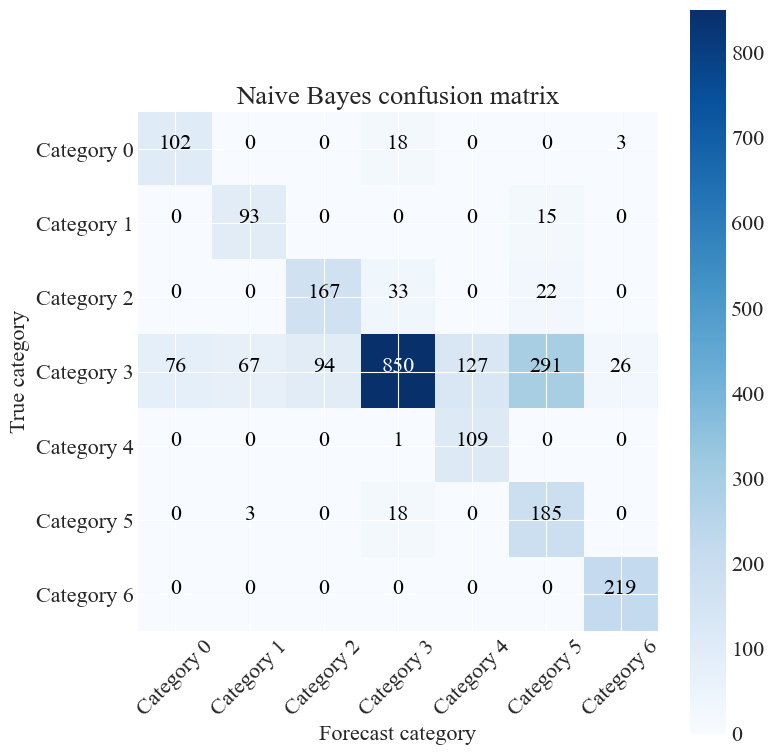

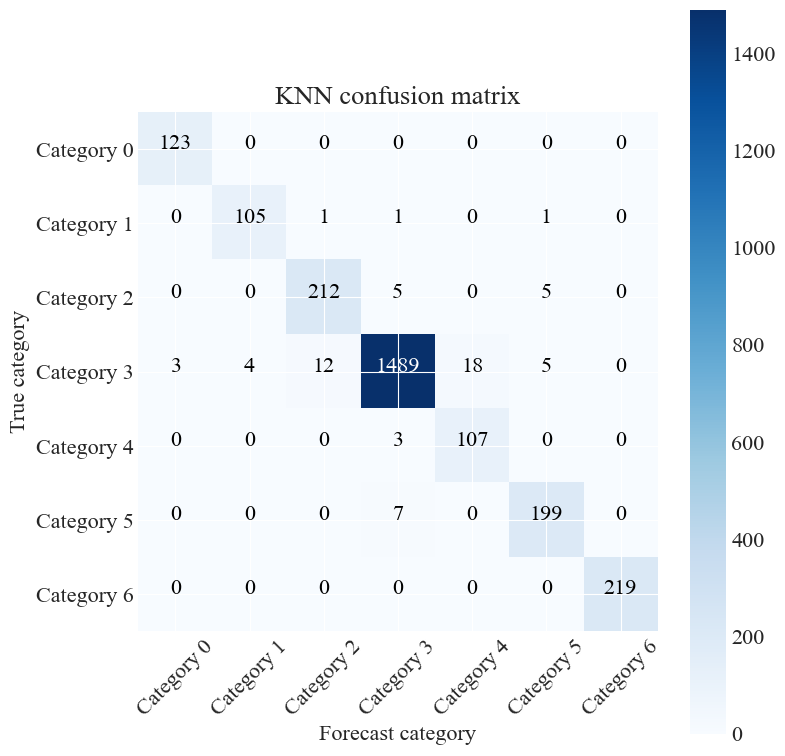

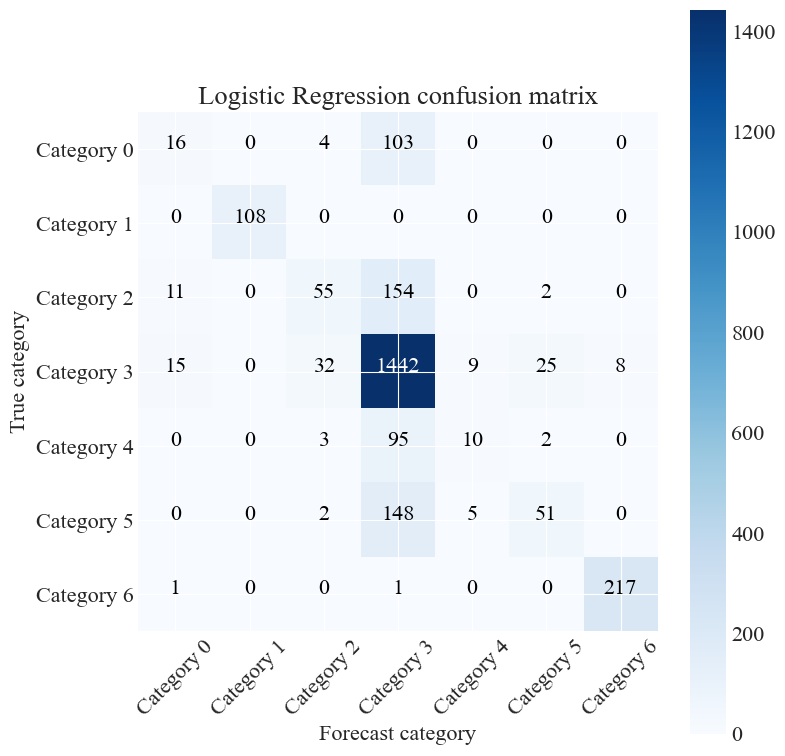

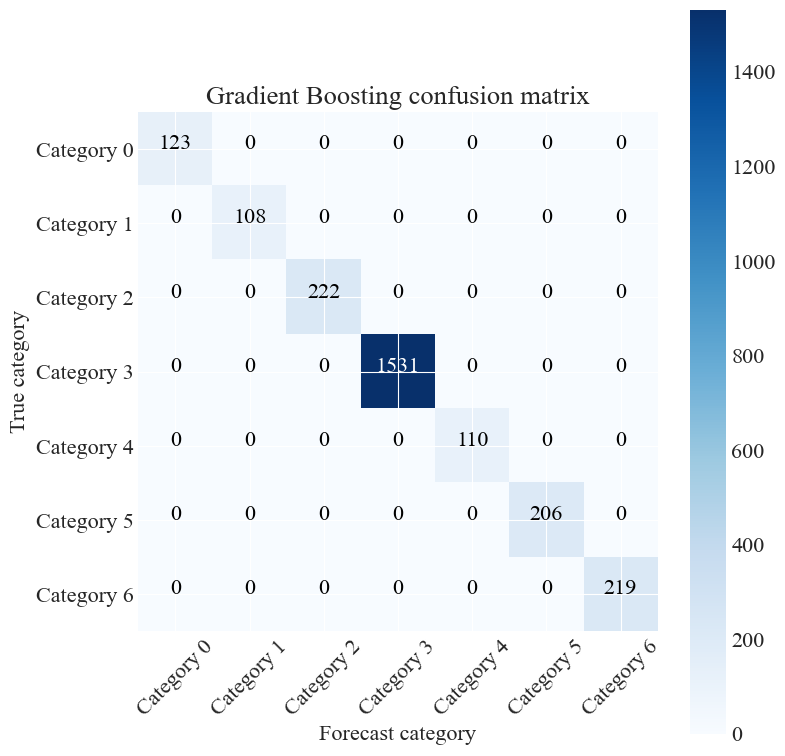

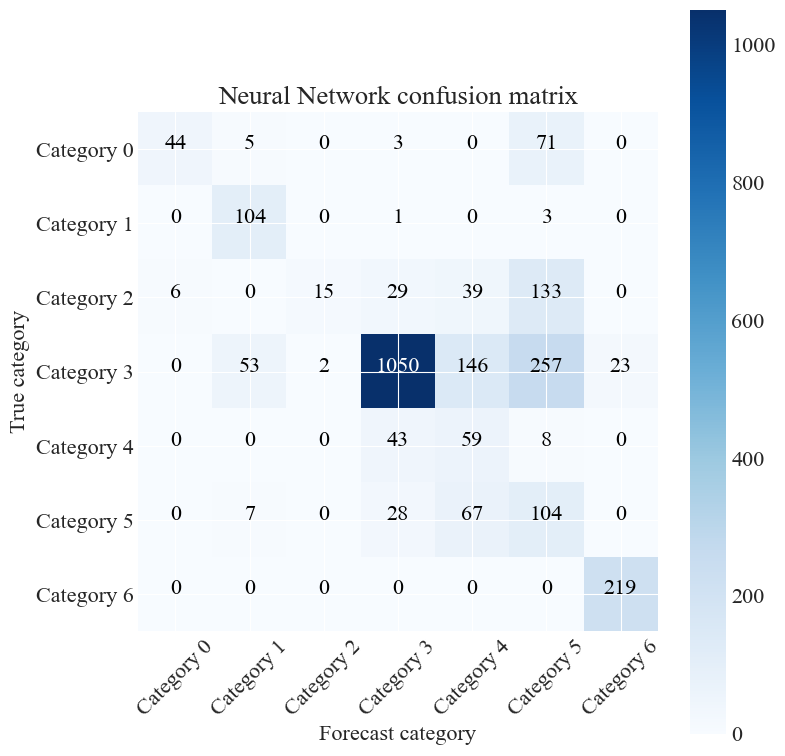

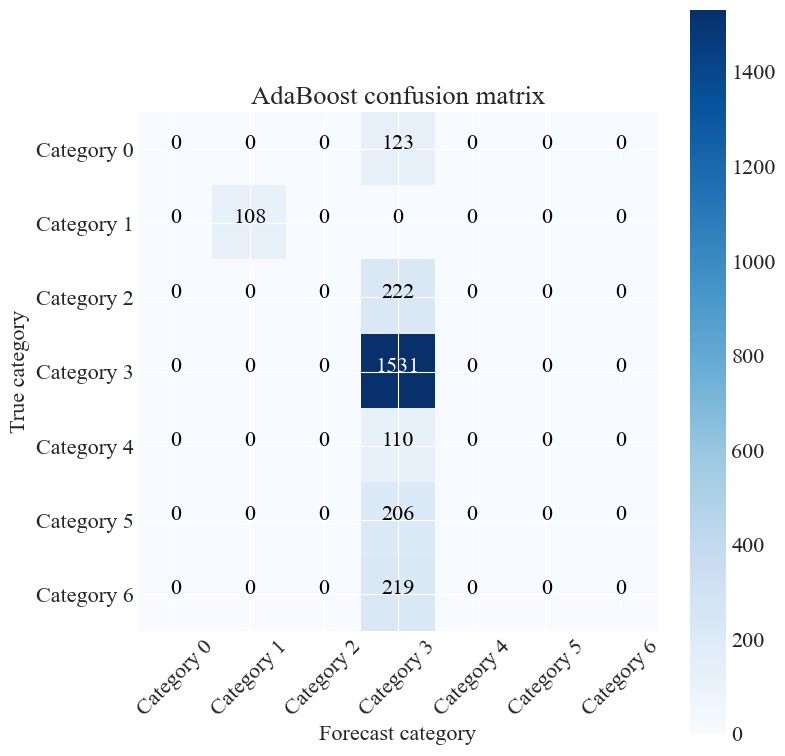

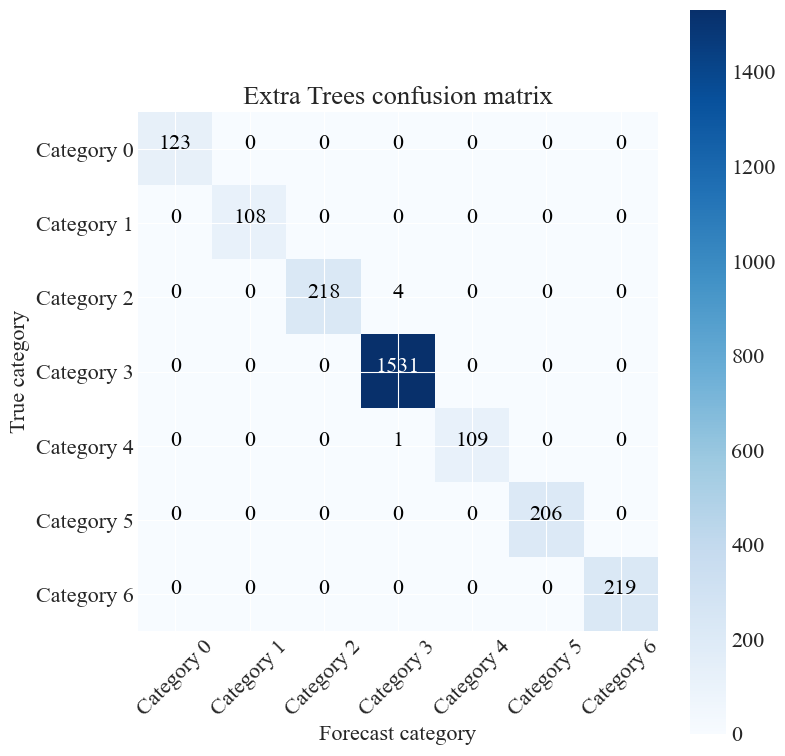

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Classifier Dictionary
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# List of category names
classes = ['Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6']  

# Train and evaluate each classifier and plot the confusion matrix
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)
    cm = confusion_matrix(Ytest, Ypred)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Label the quantities in each cell of the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True category')
    plt.xlabel('Forecast category')
    plt.show()
    plt.rcParams['font.family']

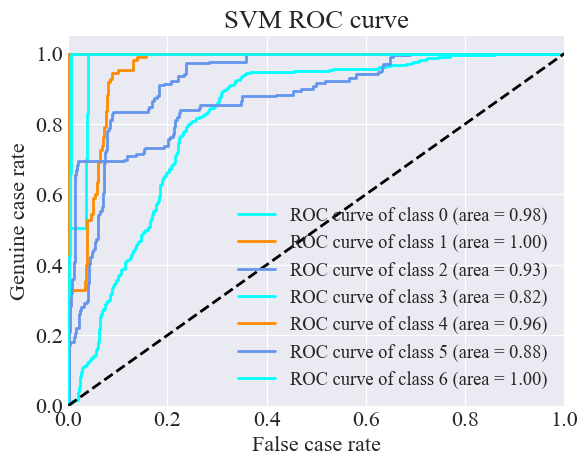

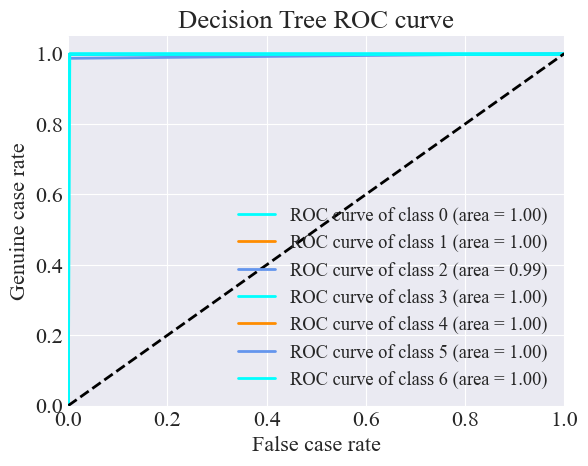

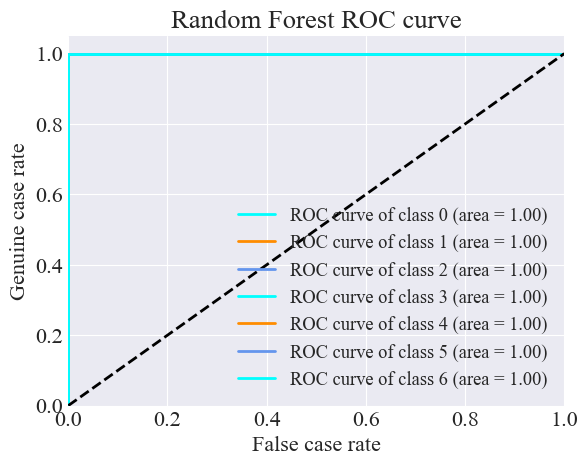

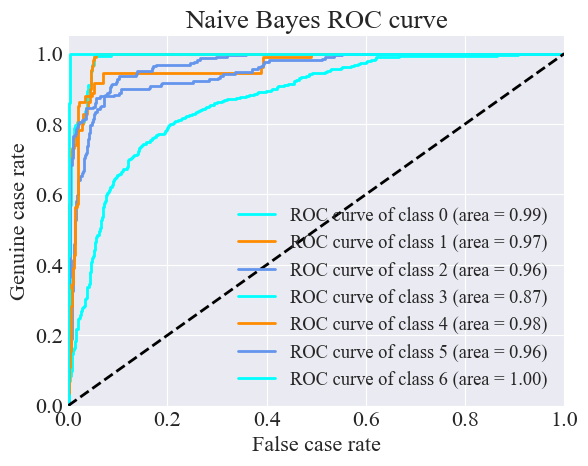

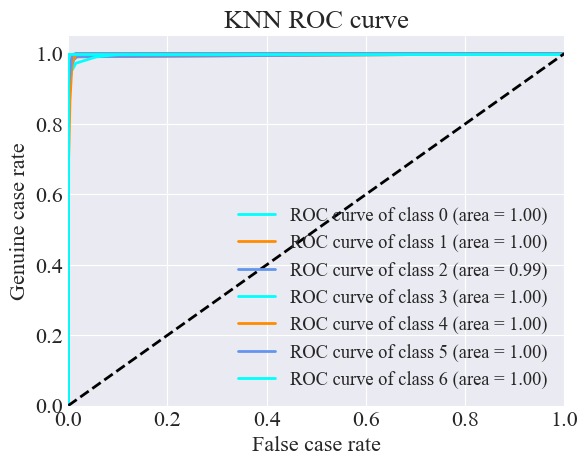

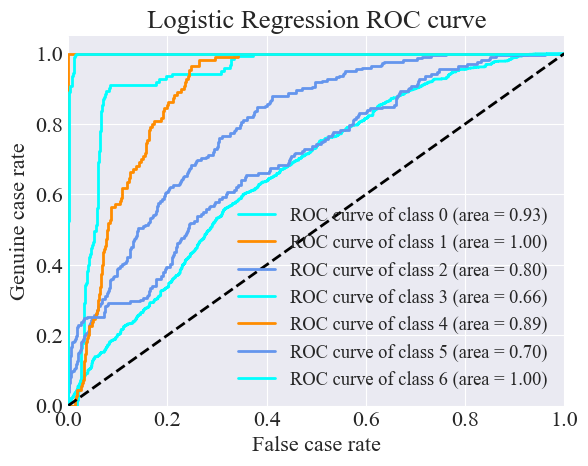

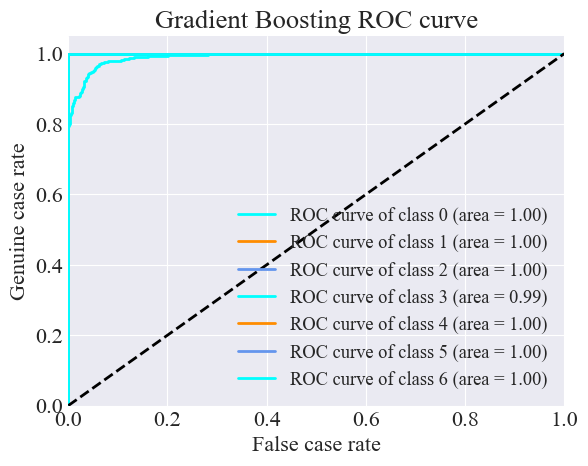

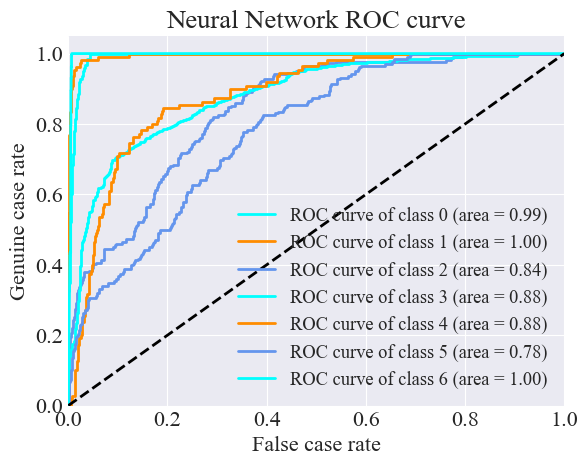

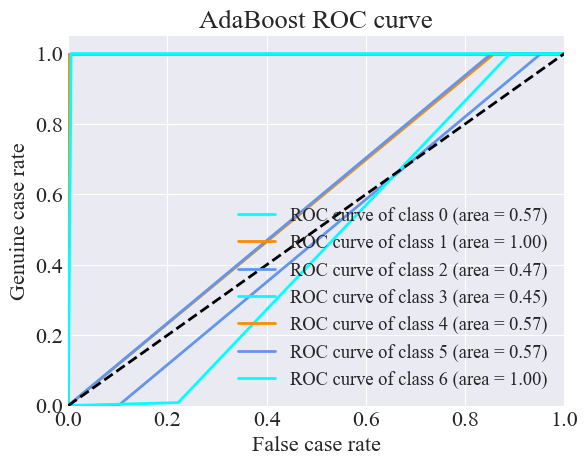

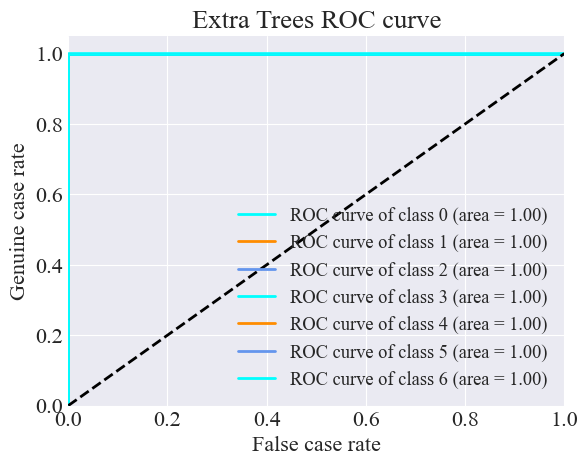

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Classifier Dictionary
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42)
}

# List of category names
classes = ['Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6'] 
n_classes = len(classes)

# Binarization of Ytest for multicategorical ROC curves
Ytest_bin = label_binarize(Ytest, classes=range(n_classes))

# Calculate the ROC curve and AUC for each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Yscore = clf.decision_function(Xtest) if hasattr(clf, "decision_function") else clf.predict_proba(Xtest)
    
    # Calculate ROC curves and AUC for each category
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Ytest_bin[:, i], Yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting the ROC curve
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False case rate')
    plt.ylabel('Genuine case rate')
    plt.title(f'{name} ROC curve')
    plt.legend(loc="lower right", fontsize='small')
    plt.show()
    plt.rcParams['font.family']

In [18]:
X = c.iloc[:,:18]
Y = c.iloc[:,-1]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.3)

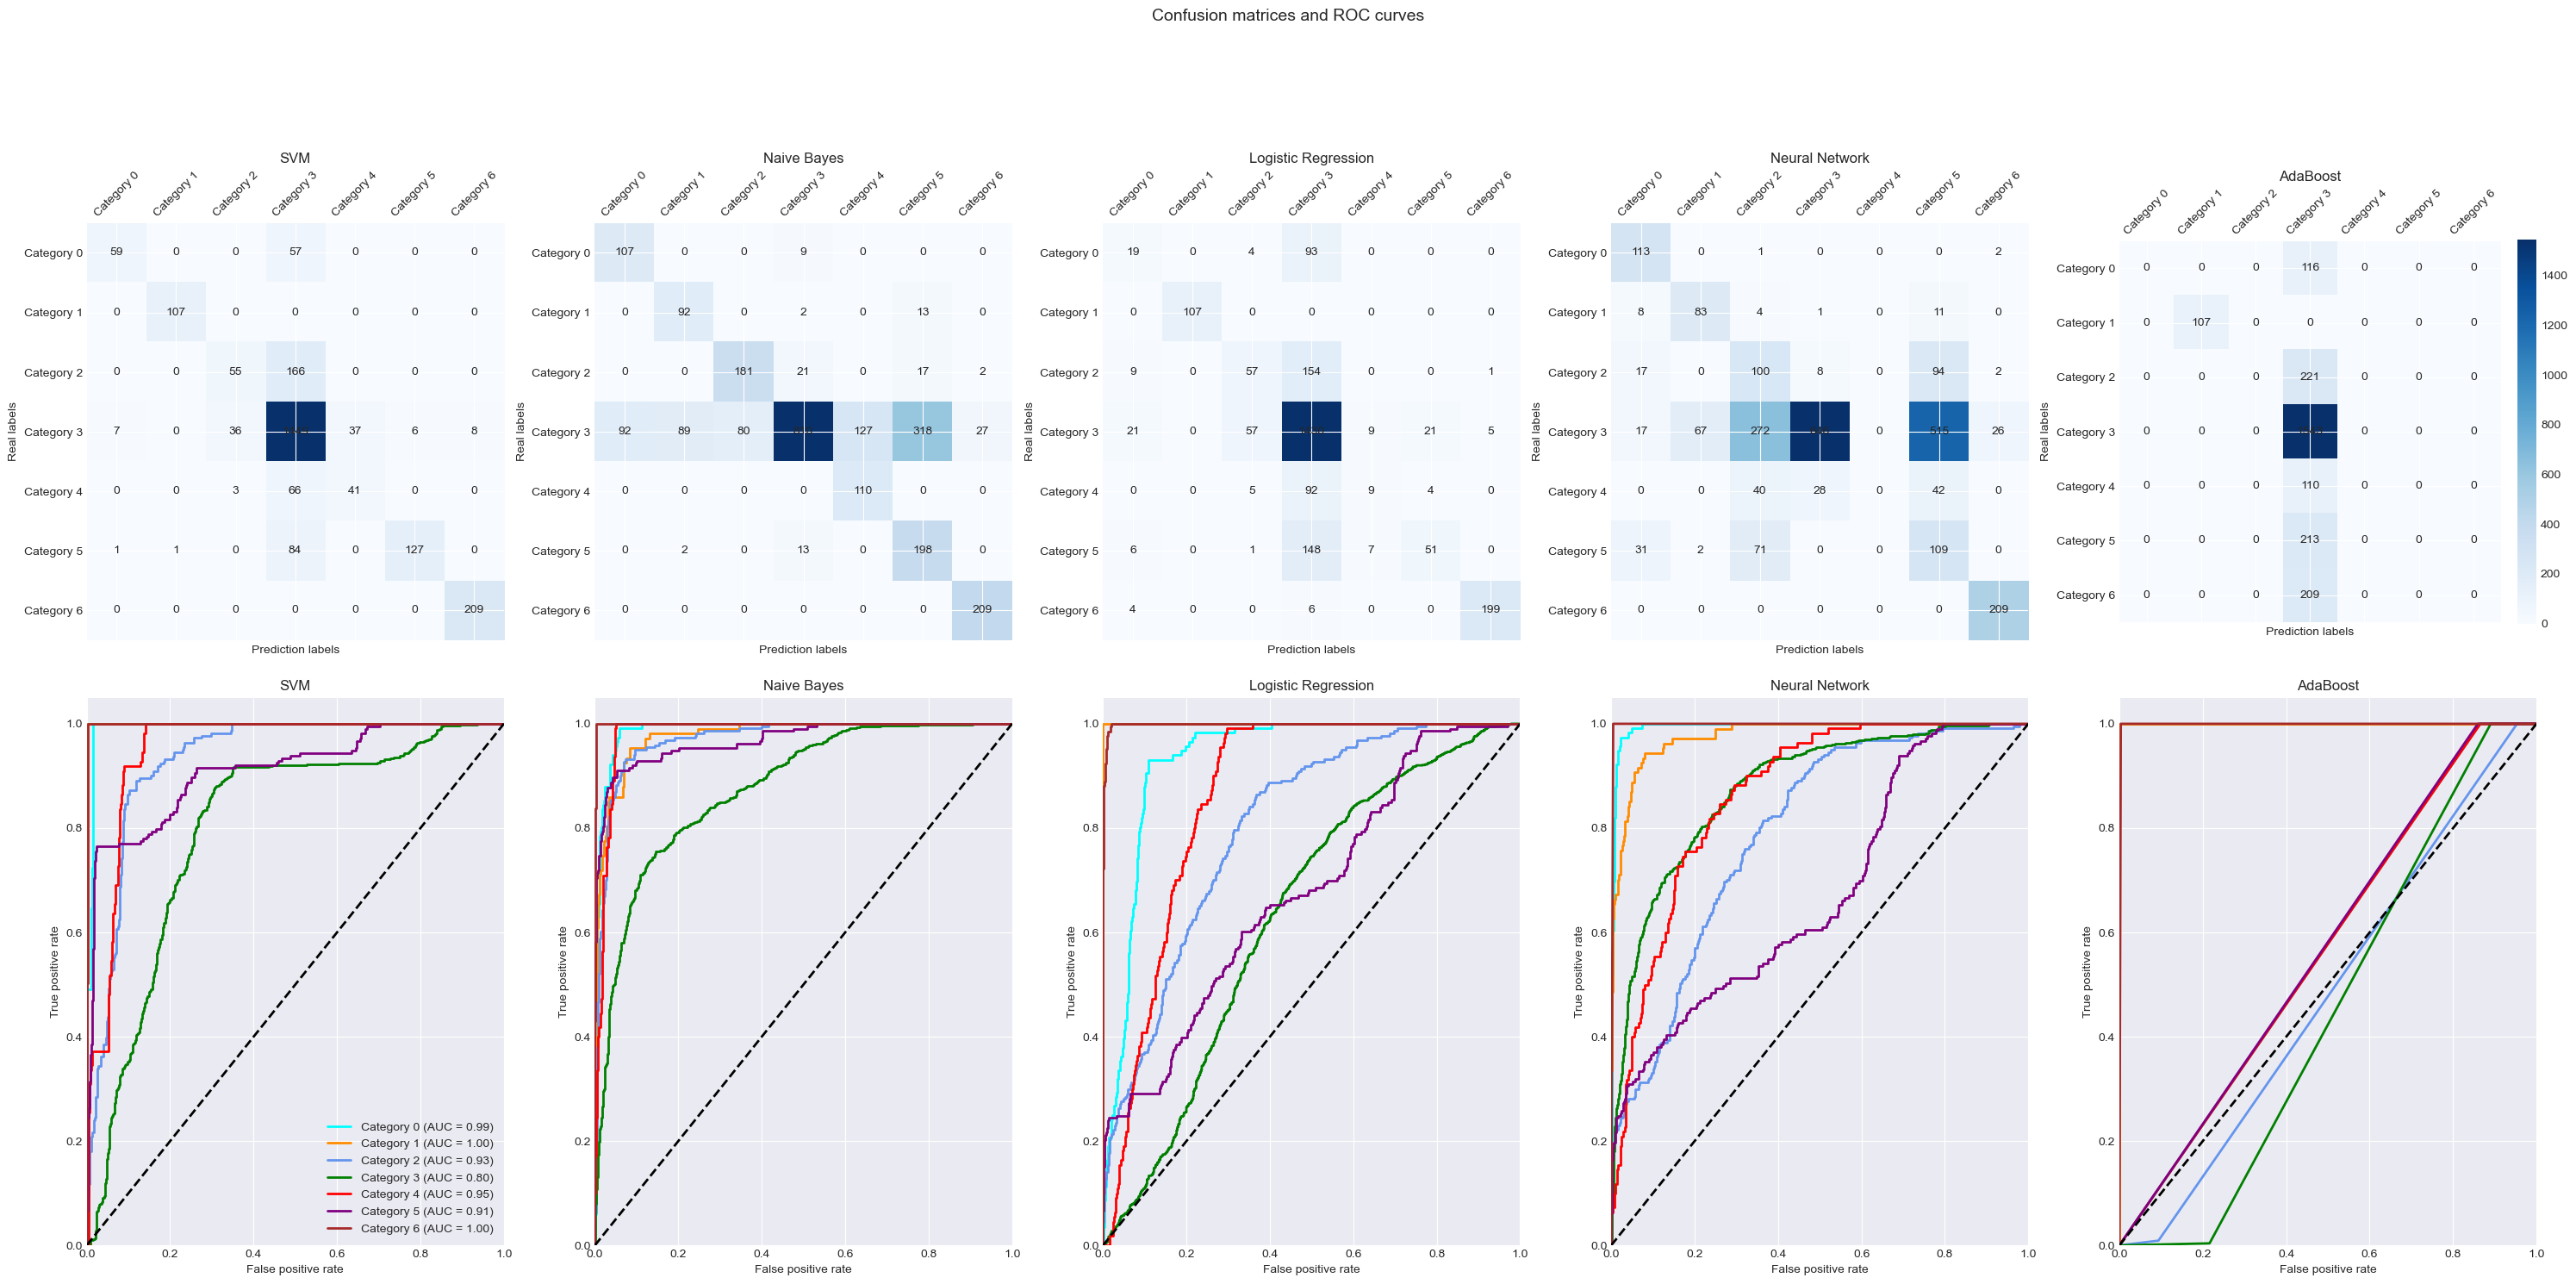

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Classifier Dictionary
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42, probability=True),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Neural Network": MLPClassifier(random_state=42, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
}

# List of aliases
classes = ['Category 0', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5', 'Category 6']
n_classes = len(classes)

# Binarization of Ytest for multicategorical ROC curves
Ytest_bin = label_binarize(Ytest, classes=range(n_classes))
plt.style.use('seaborn-v0_8-darkgrid')  
# Setting the subgraph layout
fig, axarr = plt.subplots(2, len(classifiers), figsize=(30, 15))
fig.suptitle('Confusion matrices and ROC curves', fontsize=14, y=1.02)

# Plot the confusion matrix and ROC curves for each model
for idx, (name, clf) in enumerate(classifiers.items()):
    # Train the model and predict
    clf.fit(Xtrain, Ytrain)
    Ypred = clf.predict(Xtest)
    Yscore = clf.decision_function(Xtest) if hasattr(clf, "decision_function") else clf.predict_proba(Xtest)
    
    # Drawing the confusion matrix
    cm = confusion_matrix(Ytest, Ypred)
    ax = axarr[0, idx]  
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(f'{name}')
    ax.set_xlabel('Prediction labels')
    ax.set_ylabel('Real labels')
    
    # Adding numbers to the confusion matrix
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, str(cm[i, j]), va='center', ha='center')
    
    # Setting the scale position
    ax.set_xticks(np.arange(len(classes)))
    ax.set_yticks(np.arange(len(classes)))
    
    # Set scale labels and rotate 45 degrees
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticklabels(classes)

    # Calculate ROC curves and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Ytest_bin[:, i], Yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Plotting the ROC curve
    ax = axarr[1, idx]  
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown'])
    for i, color in zip(range(n_classes), colors):
        ax.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Category {i} (AUC = {roc_auc[i]:.2f})' if idx == 0 else "")
    ax.plot([0, 1], [0, 1], 'k--', lw=2)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'{name}')
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    if idx == 0:
        ax.legend(loc="lower right")

# Add a color bar next to the rightmost confusion matrix
fig.colorbar(cax, ax=axarr[0, -1], fraction=0.046, pad=0.04)

# Adjusting subgraph spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig('my_figure_9.1.png', dpi=300, facecolor='w')
plt.show()

In [ ]:
# Calculation of feature importance under each classifier

In [27]:
import numpy as np
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier


# Define a list of classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42),
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "CatBoost": cb.CatBoostClassifier(random_state=42, verbose=0)
}

# Train each classifier and print feature importance
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        print(f"{name} Feature Importances:")
        for i, importance in enumerate(importances):
            print(f"Feature {i}: Importance {importance:.6f}")
    else:
        print(f"{name} does not provide feature importances.")
    print("\n")

Decision Tree Feature Importances:
Feature 0: Importance 0.000000
Feature 1: Importance 0.000000
Feature 2: Importance 0.000000
Feature 3: Importance 0.002046
Feature 4: Importance 0.000000
Feature 5: Importance 0.002539
Feature 6: Importance 0.010426
Feature 7: Importance 0.292178
Feature 8: Importance 0.049282
Feature 9: Importance 0.255431
Feature 10: Importance 0.208077
Feature 11: Importance 0.080429
Feature 12: Importance 0.028833
Feature 13: Importance 0.044531
Feature 14: Importance 0.015253
Feature 15: Importance 0.010975
Feature 16: Importance 0.000000
Feature 17: Importance 0.000000


Random Forest Feature Importances:
Feature 0: Importance 0.000258
Feature 1: Importance 0.001793
Feature 2: Importance 0.000646
Feature 3: Importance 0.012852
Feature 4: Importance 0.009796
Feature 5: Importance 0.018175
Feature 6: Importance 0.022658
Feature 7: Importance 0.222667
Feature 8: Importance 0.078874
Feature 9: Importance 0.177559
Feature 10: Importance 0.164103
Feature 11: Importan

In [ ]:
# Building Early Warning Regression Models
# have RI

In [25]:
X_ = df.iloc[:,:16]
Y = df.iloc[:,-1]

In [26]:
X_train,X_test,Ytrain,Ytest = train_test_split(X_,Y,test_size=0.3)

In [27]:
X_train.shape

(5877, 16)

In [49]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=10,max_depth=5),
    "Random Forest": RandomForestClassifier(random_state=300,max_depth=5),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=30),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=300,max_depth=5,n_estimators=5,max_features=2,min_samples_leaf=3,learning_rate=0.01),
    "Neural Network": MLPClassifier(random_state=60, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=1000,max_depth=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, Ytrain)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Ytest, Y_pred)
    print(f"{name} Accuracy: {accuracy:.6f}")

SVM Accuracy: 0.803890
Decision Tree Accuracy: 0.850337
Random Forest Accuracy: 0.853116
Naive Bayes Accuracy: 0.671298
KNN Accuracy: 0.874553
Logistic Regression Accuracy: 0.737594
Gradient Boosting Accuracy: 0.611354
Neural Network Accuracy: 0.737594
AdaBoost Accuracy: 0.651052
Extra Trees Accuracy: 0.726876


In [21]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score

# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=10,max_depth=5),
    "Random Forest": RandomForestClassifier(random_state=300,max_depth=5),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=30),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=300,max_depth=5,n_estimators=5,max_features=2,min_samples_leaf=3,learning_rate=0.01),
    "Neural Network": MLPClassifier(random_state=60, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=1000,max_depth=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Y_pred = clf.predict(Xtest)
    precision = precision_score(Ytest, Y_pred, average='weighted',zero_division=1)
    print(f"{name} Precision: {precision:.6f}")

SVM Precision: 0.799899
Decision Tree Precision: 0.883008
Random Forest Precision: 0.892866
Naive Bayes Precision: 0.806871
KNN Precision: 0.860386
Logistic Regression Precision: 0.738489
Gradient Boosting Precision: 0.764708
Neural Network Precision: 0.751141
AdaBoost Precision: 0.783678
Extra Trees Precision: 0.817684


In [19]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score


# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=10,max_depth=5),
    "Random Forest": RandomForestClassifier(random_state=300,max_depth=5),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=30),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=300,max_depth=5,n_estimators=5,max_features=2,min_samples_leaf=3,learning_rate=0.01),
    "Neural Network": MLPClassifier(random_state=60, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=1000,max_depth=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Y_pred = clf.predict(Xtest)
    recall = recall_score(Ytest, Y_pred, average='weighted')
    print(f"{name} Recall: {recall:.6f}")

SVM Recall: 0.808257
Decision Tree Recall: 0.851131
Random Forest Recall: 0.870981
Naive Bayes Recall: 0.678841
KNN Recall: 0.866217
Logistic Regression Recall: 0.772529
Gradient Boosting Recall: 0.621278
Neural Network Recall: 0.750695
AdaBoost Recall: 0.668122
Extra Trees Recall: 0.741961


In [20]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

# Define the classifier
classifiers = {
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=10,max_depth=5),
    "Random Forest": RandomForestClassifier(random_state=300,max_depth=5),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=30),
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000)),
    "Gradient Boosting": GradientBoostingClassifier(random_state=300,max_depth=5,n_estimators=5,max_features=2,min_samples_leaf=3,learning_rate=0.01),
    "Neural Network": MLPClassifier(random_state=60, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Extra Trees": ExtraTreesClassifier(random_state=1000,max_depth=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(Xtrain, Ytrain)
    Y_pred = clf.predict(Xtest)
    f1 = f1_score(Ytest, Y_pred, average='weighted')
    print(f"{name} F1 Score: {f1:.6f}\n")

SVM F1 Score: 0.782110

Decision Tree F1 Score: 0.834714

Random Forest F1 Score: 0.834792

Naive Bayes F1 Score: 0.691275

KNN F1 Score: 0.852449

Logistic Regression F1 Score: 0.743164

Gradient Boosting F1 Score: 0.476151

Neural Network F1 Score: 0.703073

AdaBoost F1 Score: 0.537162

Extra Trees F1 Score: 0.657488



In [2]:
# Mapping the Characteristic Decision Boundary
# The plotted graphs help to visualize how each classifier divides the feature space into different classes and allows for a visual comparison of their performance. This type of visualization is often used to understand and explain the behavior of models, especially in feature selection and model comparison.

In [3]:
import pandas as pd

df = pd.read_csv('merged_data.csv')
df

feature_良好  feature_较好  feature_较差  Unnamed: 0  Unnamed: 1  Unnamed: 2  \
0            0.0         0.0         1.0       201.8       6.184      17.150   
1            1.0         0.0         0.0       201.8       6.184      16.190   
2            1.0         0.0         0.0       160.4       3.391      17.740   
3            1.0         0.0         0.0       160.4       3.391      26.090   
4            1.0         0.0         0.0       137.1       9.490       7.409   
...          ...         ...         ...         ...         ...         ...   
8391         1.0         0.0         0.0       166.7      10.880      11.292   
8392         0.0         0.0         1.0       228.7      11.260      11.990   
8393         0.0         0.0         1.0       228.7      11.260      17.680   
8394         0.0         0.0         1.0       227.8       7.752      11.770   
8395         0.0         0.0         1.0       227.8       7.752      66.470   

      Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0          0.439         956        8.36        7.99        19.3       401.5   
1          0.436         955        8.24        7.99        18.5       315.8   
2          2.679         946        8.63        7.71        19.6       476.6   
3          0.203         947        8.64        7.61        19.8       384.9   
4          0.124         952        8.26        7.52        19.6       457.9   
...          ...         ...         ...         ...         ...         ...   
8391       0.868         990        7.36        4.18        18.7       385.7   
8392       0.099         982        6.96        4.18        19.0       322.9   
8393       0.221         987        7.49        3.98        19.3       322.8   
8394       0.119        1011        7.99        2.99        19.5       441.8   
8395       1.003        1018        8.08        2.67        19.8       426.7   

      Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0          1.276        0.596           59     1.333100     1.333087   
1          1.276        0.596           49     1.333391     1.333131   
2          1.411        0.661           58     1.333324     1.333134   
3          1.411        0.661           48     1.333250     1.333125   
4          1.519        0.776           43     1.333464     1.333175   
...          ...          ...          ...          ...          ...   
8391       1.007        0.449           80     1.333080     1.333188   
8392       2.319        1.318           39     1.333099     1.333139   
8393       2.319        1.318           74     1.333068     1.333148   
8394       2.519        1.166           74     1.333096     1.333199   
8395       2.519        1.166           74     1.333076     1.333167   

      Unnamed: 14  encoded_labels  
0              96               3  
1              96               3  
2              98               3  
3              98               3  
4              90               3  
...           ...             ...  
8391           91               1  
8392           91               1  
8393           80               1  
8394           80               1  
8395           79               1  

[8396 rows x 19 columns]

In [24]:
X = df.iloc[:, :18].values  
y = df.iloc[:, -1].values  

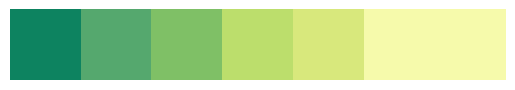

In [28]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['#0d8360', '#55a86e','#7fc066','#bcde6c','#d8e87c','#f6faab'])

plt.imshow([[0, 1, 2, 3, 4, 5, 6]], cmap=cmap)
plt.axis('off')
plt.show()

DecisionTree with features [13, 15] has a score of 0.9288947117675084
RandomForest with 30 estimators with features [13, 15] has a score of 0.9287756074321105
ExtraTrees with 30 estimators with features [13, 15] has a score of 0.9288947117675084
AdaBoost with 30 estimators with features [13, 15] has a score of 0.7361838970938542
DecisionTree with features [8, 15] has a score of 0.9753454025726537
RandomForest with 30 estimators with features [8, 15] has a score of 0.9752262982372558
ExtraTrees with 30 estimators with features [8, 15] has a score of 0.9753454025726537
AdaBoost with 30 estimators with features [8, 15] has a score of 0.7014054311576942
DecisionTree with features [10, 15] has a score of 0.9811815150071462
RandomForest with 30 estimators with features [10, 15] has a score of 0.9811815150071462
ExtraTrees with 30 estimators with features [10, 15] has a score of 0.9811815150071462
AdaBoost with 30 estimators with features [10, 15] has a score of 0.8561219628394473


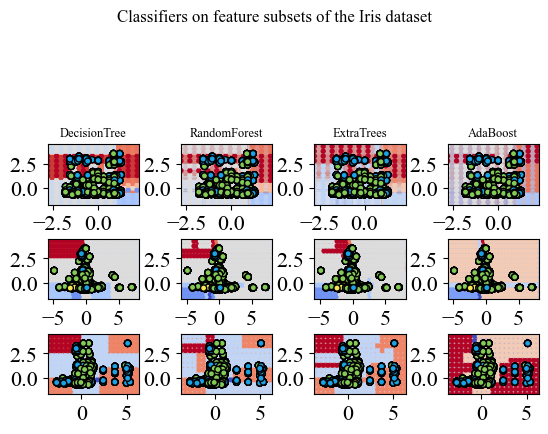

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap


from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = 'coolwarm'
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
X = df.iloc[:,:18].values
y = df.iloc[:,-1].values

plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
]

for pair in ([13,15],[8,15],[10,15]):
    for model in models:
        # We only take the two corresponding features
        X = df.iloc[:, :18].values[:, pair]
        y = df.iloc[:, -1].values
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)

        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))

        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["#f6e656", "#84cb55", "#1ca1e4"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

DecisionTree with features [13, 15] has a score of 0.9288947117675084
RandomForest with 30 estimators with features [13, 15] has a score of 0.9287756074321105
ExtraTrees with 30 estimators with features [13, 15] has a score of 0.9288947117675084
AdaBoost with 30 estimators with features [13, 15] has a score of 0.7361838970938542
 with features [13, 15] has a score of 0.6753215817055741
 with features [13, 15] has a score of 0.5266793711291091
KNeighbors with features [13, 15] has a score of 0.9238923296808004
Logistic with features [13, 15] has a score of 0.6682944259171034
GradientBoosting with 30 estimators with features [13, 15] has a score of 0.7628632682229634
MLP with features [13, 15] has a score of 0.6962839447355884
DecisionTree with features [8, 15] has a score of 0.9753454025726537
RandomForest with 30 estimators with features [8, 15] has a score of 0.9752262982372558
ExtraTrees with 30 estimators with features [8, 15] has a score of 0.9753454025726537
AdaBoost with 30 estim

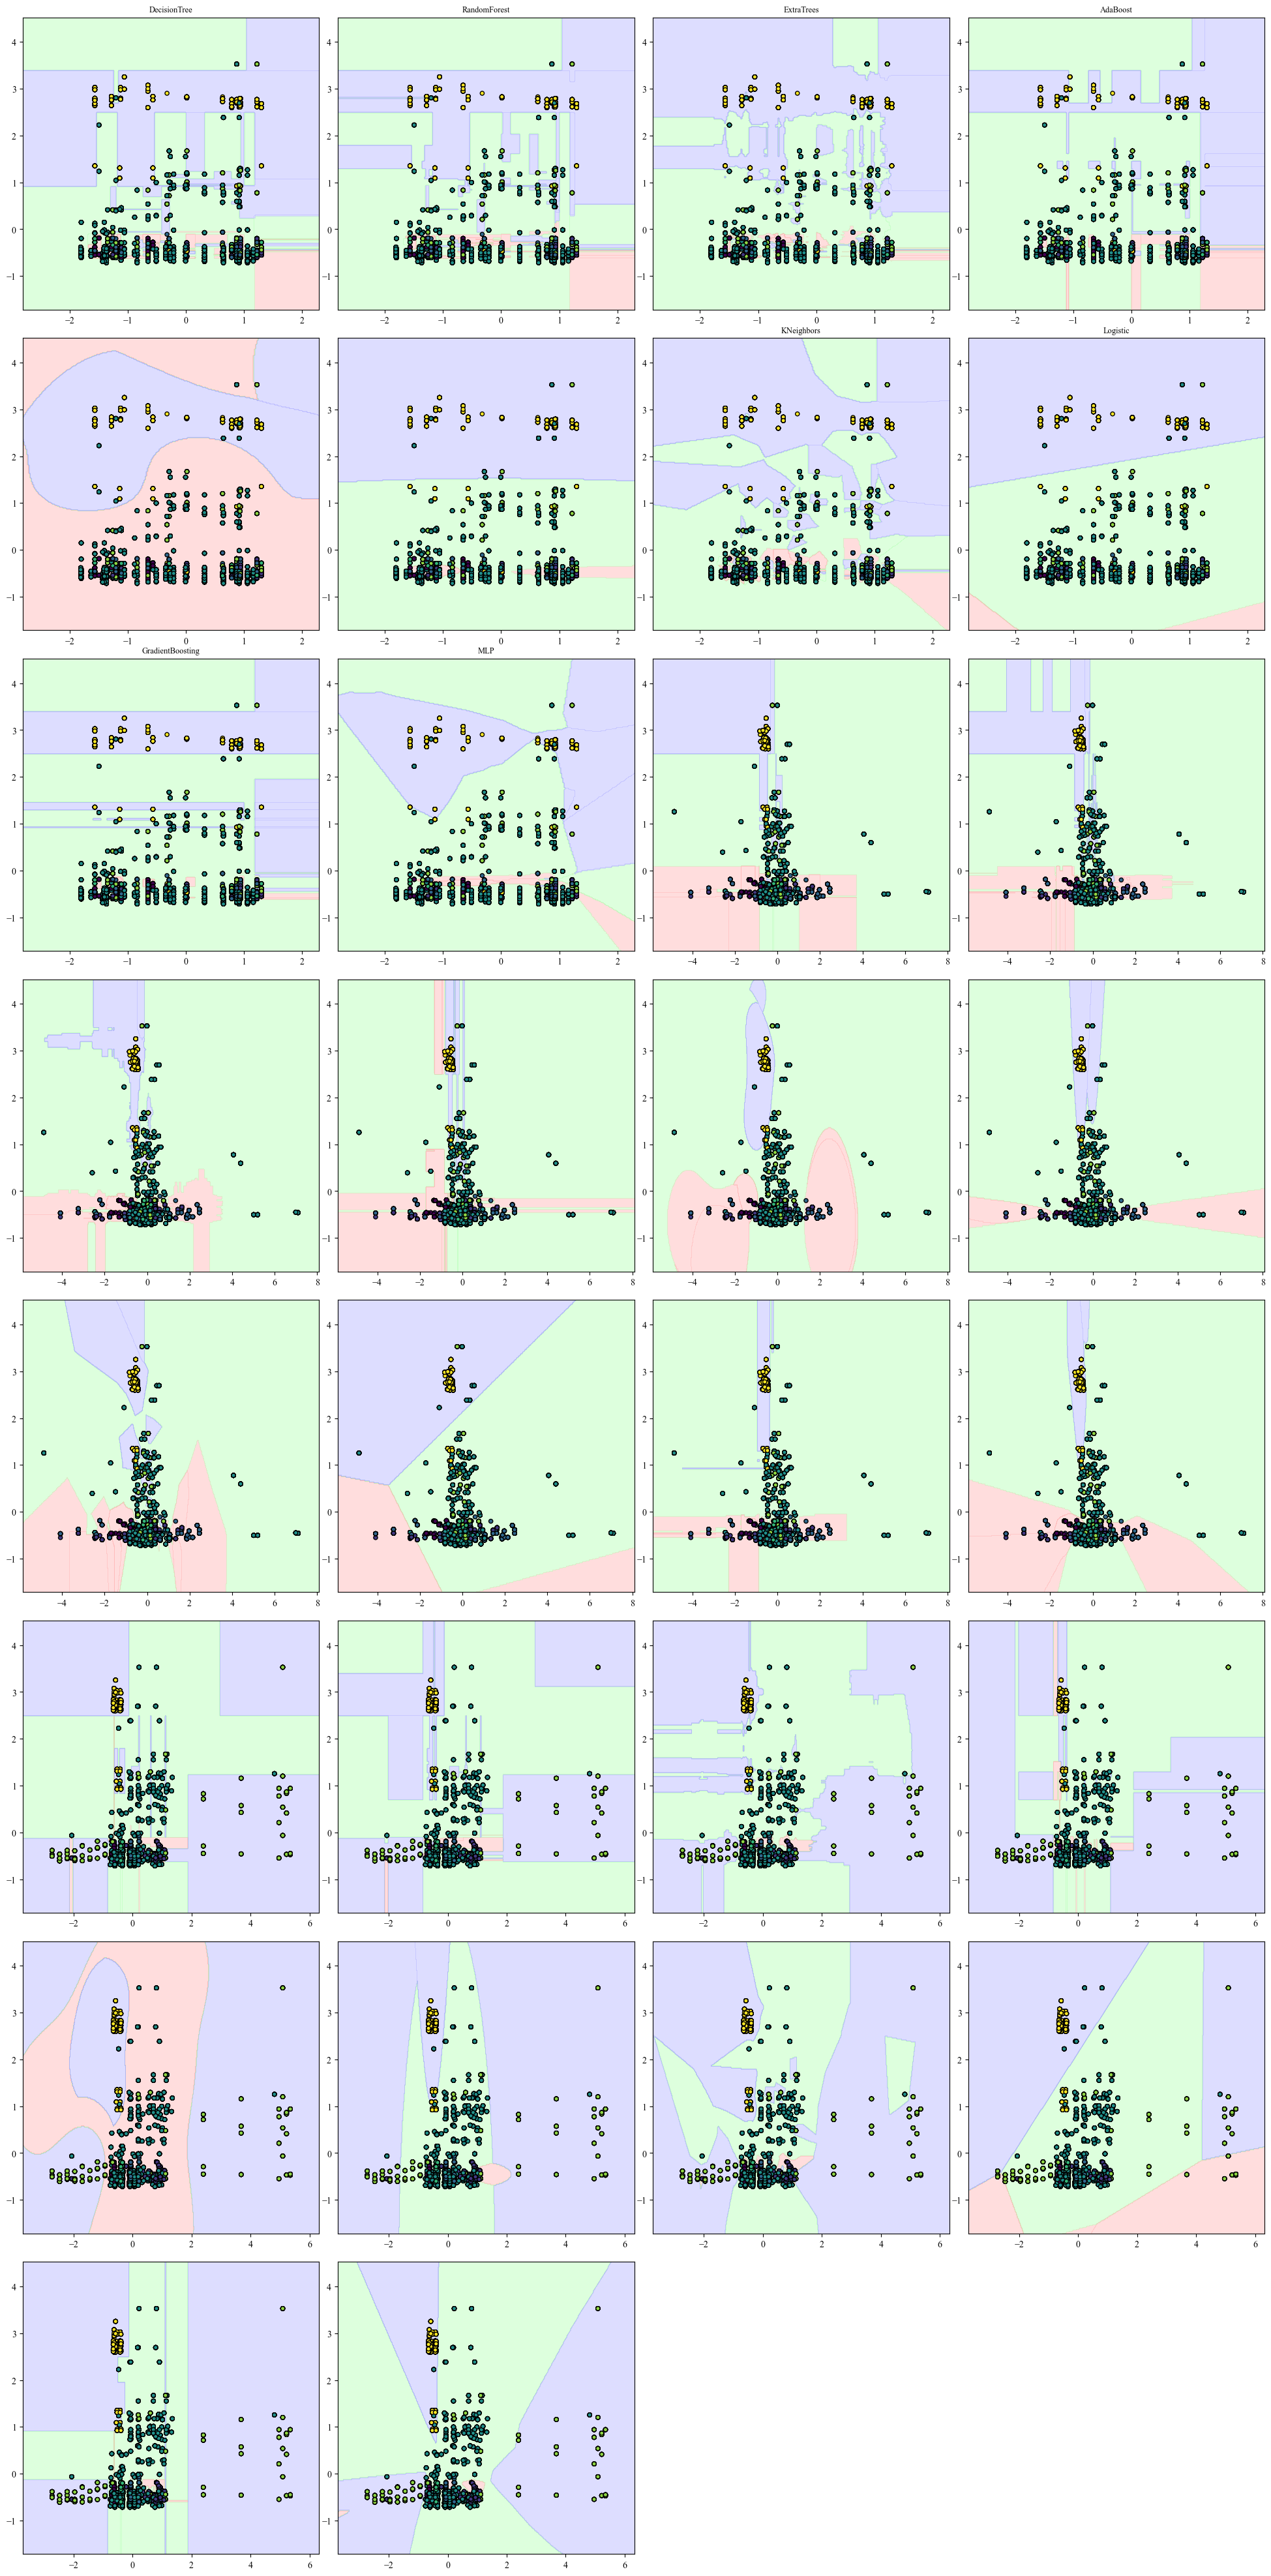

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
X = df.iloc[:,:18].values
y = df.iloc[:,-1].values

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
    SVC(probability=True),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=n_estimators),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.001)
]

# Calculate the number of rows needed to display all models' subplots
pairs = [[13, 15], [8, 15], [10, 15]]
num_models = len(models) * len(pairs)
num_cols = 4
num_rows = (num_models + num_cols - 1) // num_cols  # Round up

# Set the figure size to accommodate all subplots
plt.figure(figsize=(20, num_rows * 5))

plot_idx = 1  # Initialize plot index

for pair in pairs:
    for model in models:
        # We only take the two corresponding features
        X_pair = X[:, pair]
        y_pair = y

        # Shuffle
        idx = np.arange(X_pair.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X_pair = X_pair[idx]
        y_pair = y_pair[idx]

        # Standardize
        mean = X_pair.mean(axis=0)
        std = X_pair.std(axis=0)
        X_pair = (X_pair - mean) / std

        # Train
        clf = model.fit(X_pair, y_pair)

        scores = clf.score(X_pair, y_pair)

        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(clf)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(clf, "estimators_"):
            model_details += " with {} estimators".format(len(clf.estimators_))

        print(model_details + " with features", pair, "has a score of", scores)

        # Check if we have more subplots than the layout allows
        if plot_idx > num_rows * num_cols:
            raise ValueError("Too many subplots for the given layout")

        plt.subplot(num_rows, num_cols, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Plotting decision boundaries
        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
        plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair, s=20, edgecolor='k')

        plot_idx += 1  # Increment plot index for next subplot

# Adjust layout to prevent overlap
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

# Show the plot
plt.show()

DecisionTree with features [13, 15] has a score of 0.9288947117675084
RandomForest with 30 estimators with features [13, 15] has a score of 0.9287756074321105
ExtraTrees with 30 estimators with features [13, 15] has a score of 0.9288947117675084
AdaBoost with 30 estimators with features [13, 15] has a score of 0.7361838970938542
DecisionTree with features [8, 9] has a score of 0.9873749404478323
RandomForest with 30 estimators with features [8, 9] has a score of 0.9872558361124345
ExtraTrees with 30 estimators with features [8, 9] has a score of 0.9873749404478323
AdaBoost with 30 estimators with features [8, 9] has a score of 0.7838256312529777
DecisionTree with features [10, 11] has a score of 0.9847546450690805
RandomForest with 30 estimators with features [10, 11] has a score of 0.9847546450690805
ExtraTrees with 30 estimators with features [10, 11] has a score of 0.9847546450690805
AdaBoost with 30 estimators with features [10, 11] has a score of 0.7179609337779895


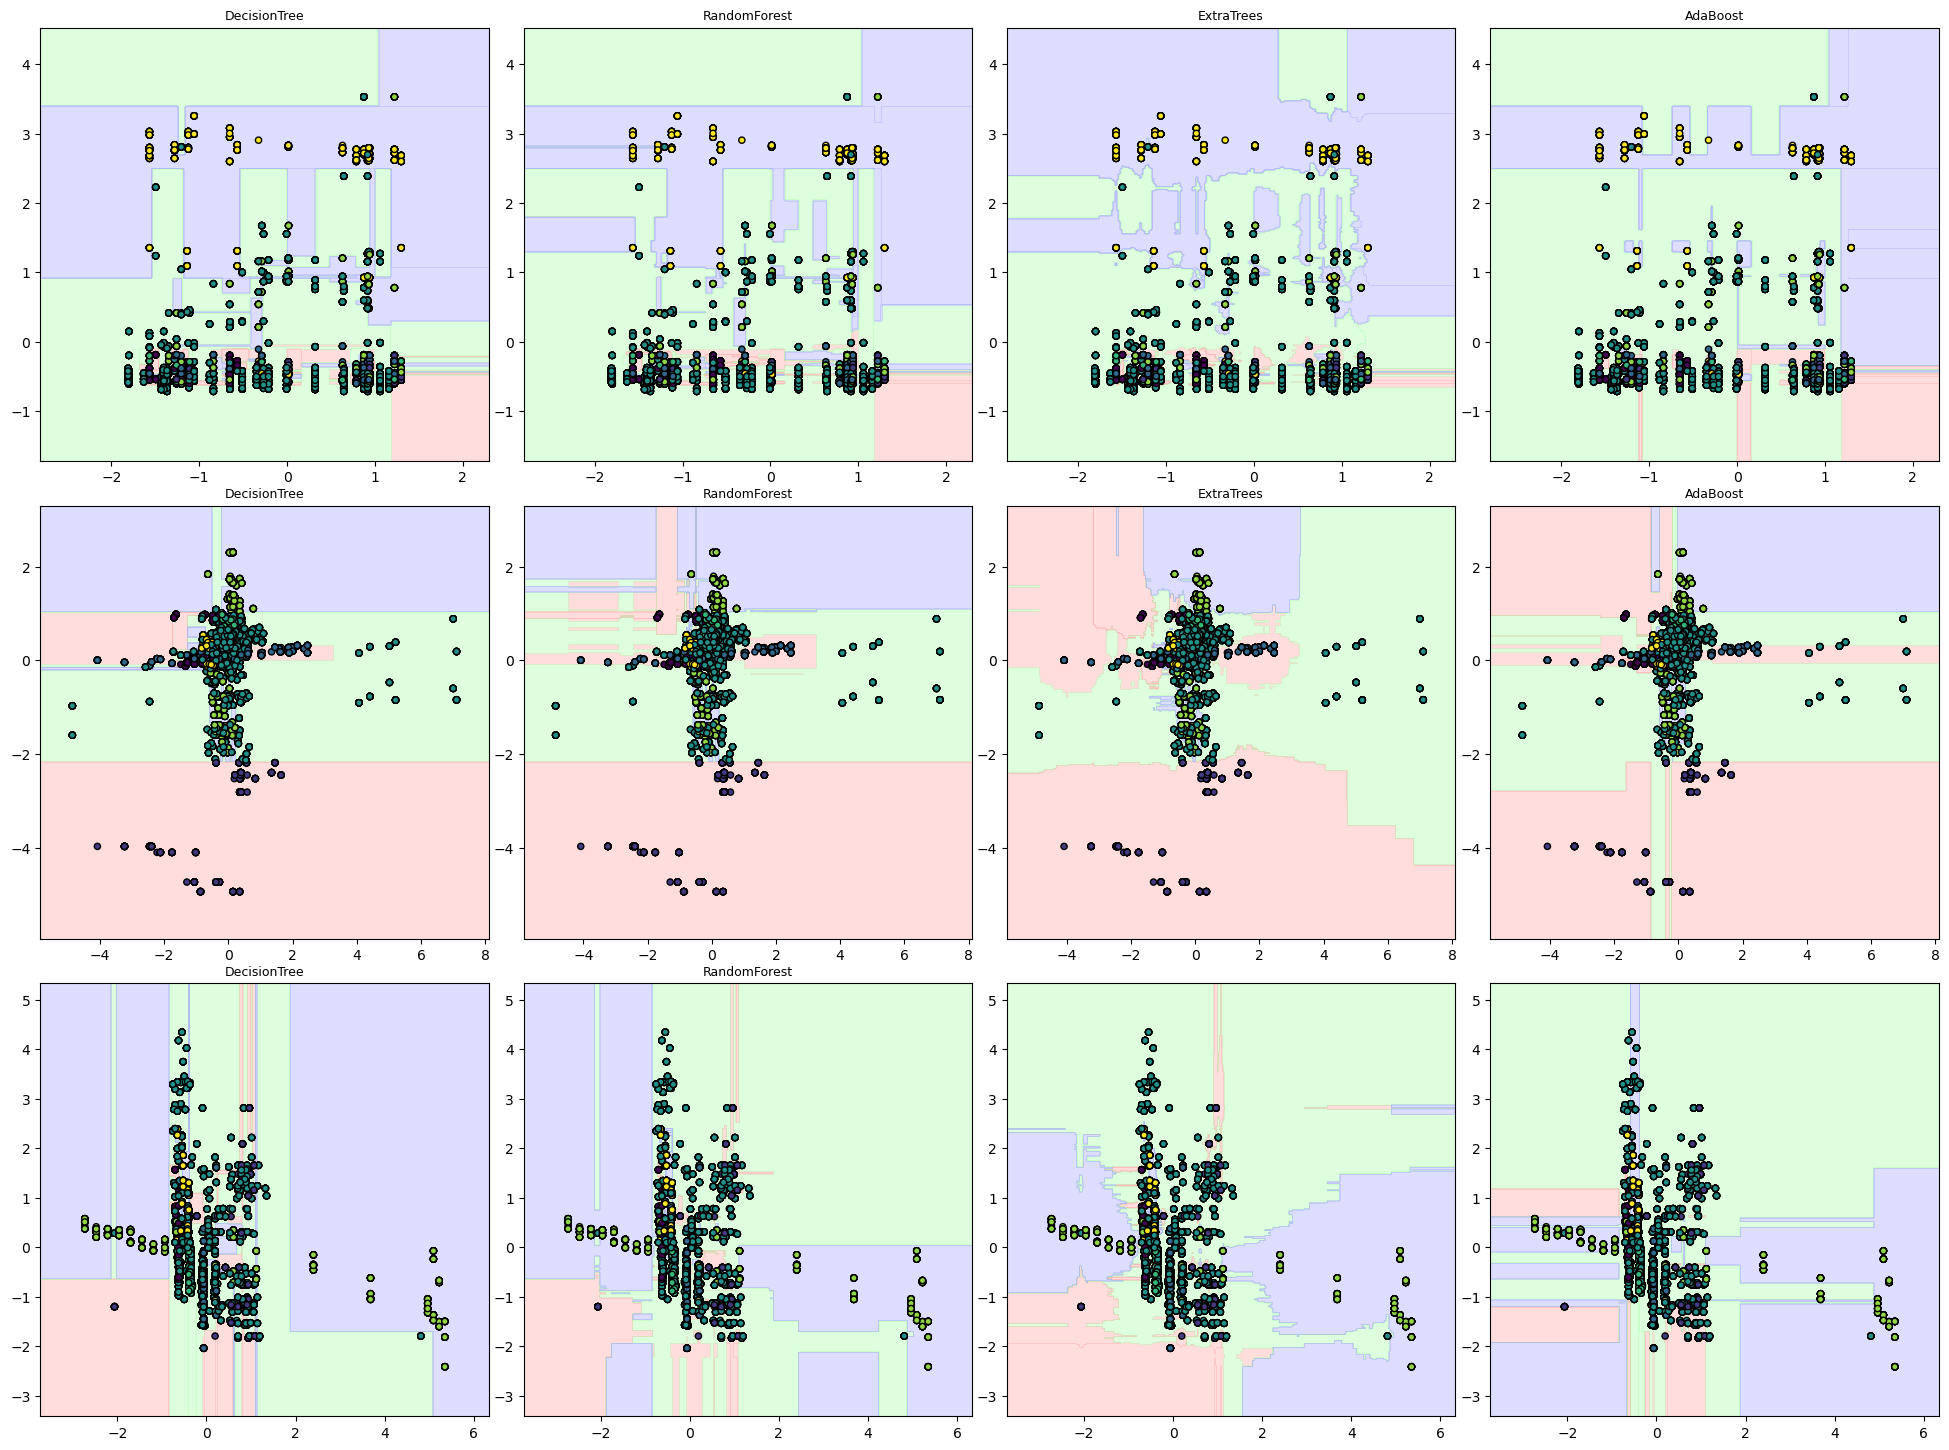

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Parameters
n_classes = 3
n_estimators = 30
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
# X = df.iloc[:,:18].values
# y = df.iloc[:,-1].values

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3),
        n_estimators=n_estimators,
        algorithm="SAMME",
    ),
    SVC(probability=True),
    GaussianNB(),
    KNeighborsClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=n_estimators),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.001)
]

# Calculate the number of rows needed to display all models' subplots
pairs = [[13, 15], [8, 9], [10, 11]]
num_models = len(models) * len(pairs)
num_cols = 4
num_rows = 3  # 设置为三行

# Set the figure size to accommodate all subplots
plt.figure(figsize=(20, num_rows * 5))

plot_idx = 1  # Initialize plot index

for pair in pairs:
    for model in models[:4]: 
        # We only take the two corresponding features
        X_pair = X[:, pair]
        y_pair = y

        # Shuffle
        idx = np.arange(X_pair.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X_pair = X_pair[idx]
        y_pair = y_pair[idx]

        # Standardize
        mean = X_pair.mean(axis=0)
        std = X_pair.std(axis=0)
        X_pair = (X_pair - mean) / std

        # Train
        clf = model.fit(X_pair, y_pair)

        scores = clf.score(X_pair, y_pair)

        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(clf)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(clf, "estimators_"):
            model_details += " with {} estimators".format(len(clf.estimators_))

        print(model_details + " with features", pair, "has a score of", scores)

        # Check if we have more subplots than the layout allows
        if plot_idx > num_rows * num_cols:
            raise ValueError("Too many subplots for the given layout")

        plt.subplot(num_rows, num_cols, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Plotting decision boundaries
        x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
        y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
        plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y_pair, s=20, edgecolor='k')

        plot_idx += 1  # Increment plot index for next subplot

# Adjust layout to prevent overlap
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.savefig('my_figure_5.png', dpi=300, facecolor='w')
# Show the plot
plt.show()